# calibration MASK

In [306]:
import numpy as np
import matplotlib.pyplot as plt
from pyaxions import jaxions as pa
from pyaxions import spectools as sp
import importlib
plt.rcParams["figure.figsize"] = (20,10)

In [623]:
f  = pa.findmfiles('out')
logi = pa.gml(f ,'logi') 
ct   = pa.gml(f ,'ct') 
# st  = pa.stringo(f)
f[-1]

Excluded corrupted file in out/: out/m/axion.m.00025


'out/m/axion.m.00024'

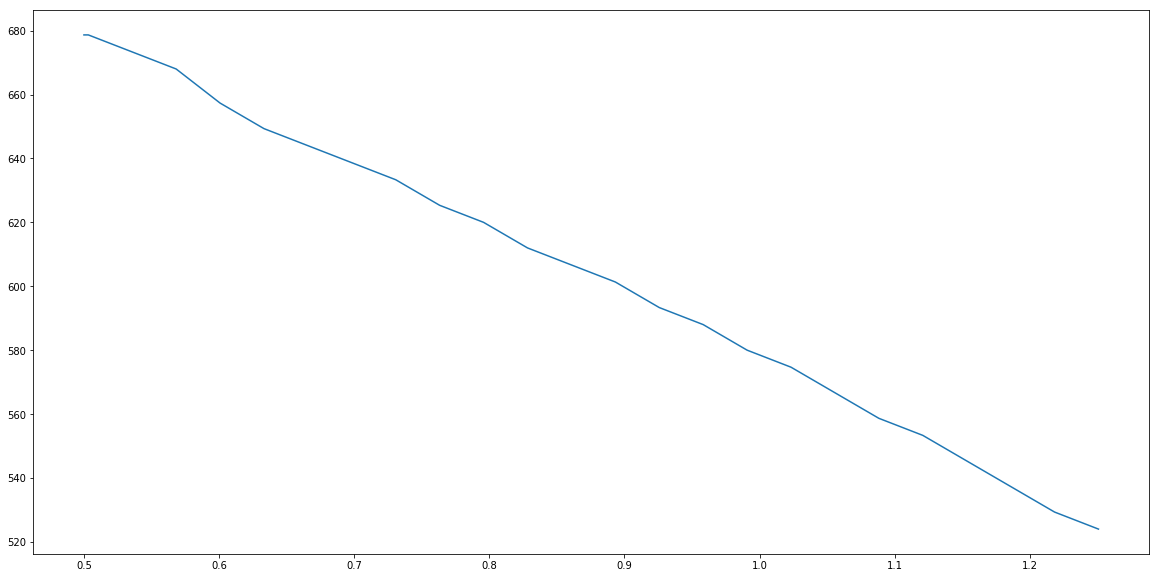

In [624]:
plt.plot(ct,pa.gml(f,'stringN')*2/3)

# Setup
First I run with a defined set of settings that control the mask width

vil, vil2 are natural maskings and are fixed

RED is filtered with $\sigma =$ radius_mask, which is defined in lattice units

In [659]:
msa = pa.gm(f[0],'msa')
msa

1.0

In [660]:
mid=-1
lis=pa.gm(f[mid],'msp_info')
lis

['W_Dif_0.50',
 'W_Dif_0.75',
 'W_Dif_1.00',
 'W_Dif_1.25',
 'W_Dif_1.50',
 'W_Dif_1.75',
 'W_Dif_2.00',
 'W_Dif_2.25',
 'W_Dif_2.50',
 'W_Dif_2.75',
 'W_Dif_3.00',
 'W_Dif_3.50',
 'W_Dif_4.00',
 'W_Dif_5.00',
 'W_Dif_6.00',
 'W_Dif_7.00',
 'W_Dif_8.00',
 'W_Dif_9.00',
 'W_Gau_0.50',
 'W_Gau_0.75',
 'W_Gau_1.00',
 'W_Gau_1.25',
 'W_Gau_1.50',
 'W_Gau_1.75',
 'W_Gau_2.00',
 'W_Gau_2.25',
 'W_Gau_2.50',
 'W_Gau_2.75',
 'W_Gau_3.00',
 'W_Gau_3.50',
 'W_Gau_4.00',
 'W_Gau_5.00',
 'W_Gau_6.00',
 'W_Gau_7.00',
 'W_Gau_8.00',
 'W_Gau_9.00',
 'W_Red_0.50',
 'W_Red_0.75',
 'W_Red_1.00',
 'W_Red_1.25',
 'W_Red_1.50',
 'W_Red_1.75',
 'W_Red_2.00',
 'W_Red_2.25',
 'W_Red_2.50',
 'W_Red_2.75',
 'W_Red_3.00',
 'W_Red_3.50',
 'W_Red_4.00',
 'W_Red_5.00',
 'W_Red_6.00',
 'W_Red_7.00',
 'W_Red_8.00',
 'W_Red_9.00',
 'W_Vi',
 'W_Vi2']

# Gaussian REDO

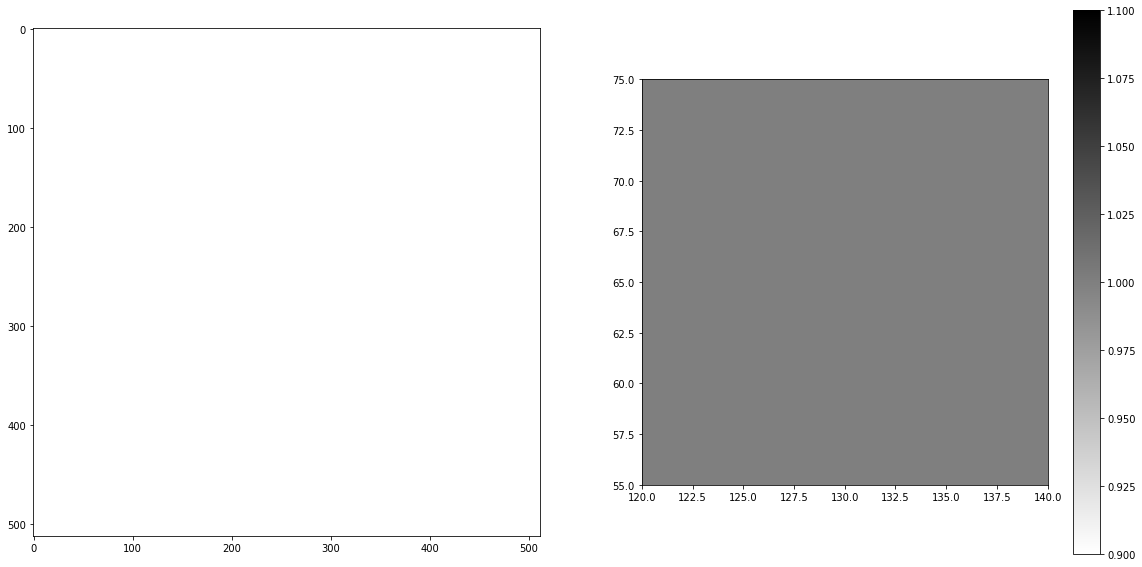

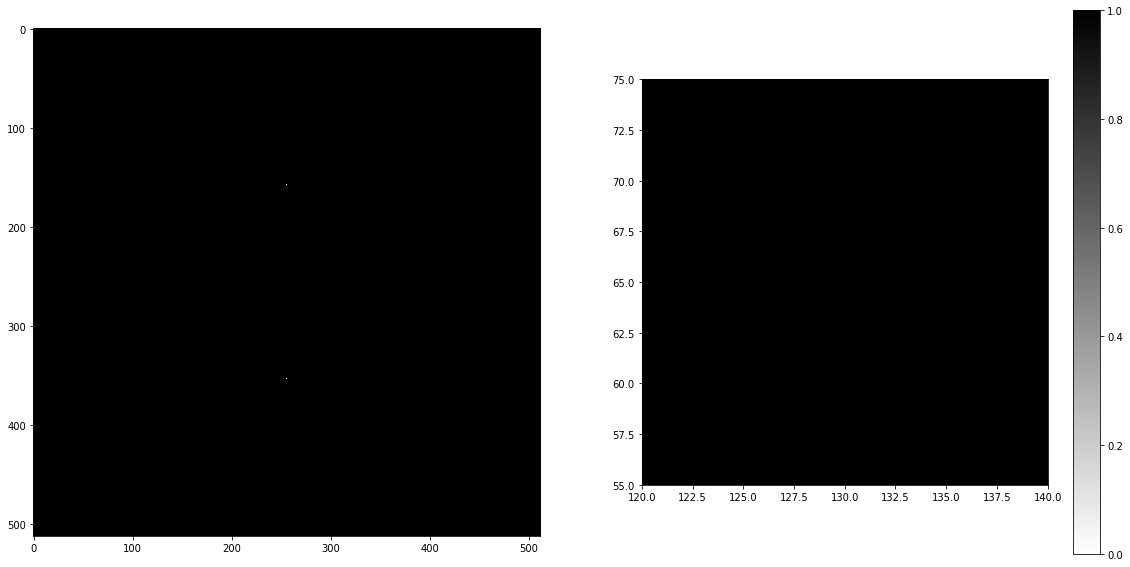

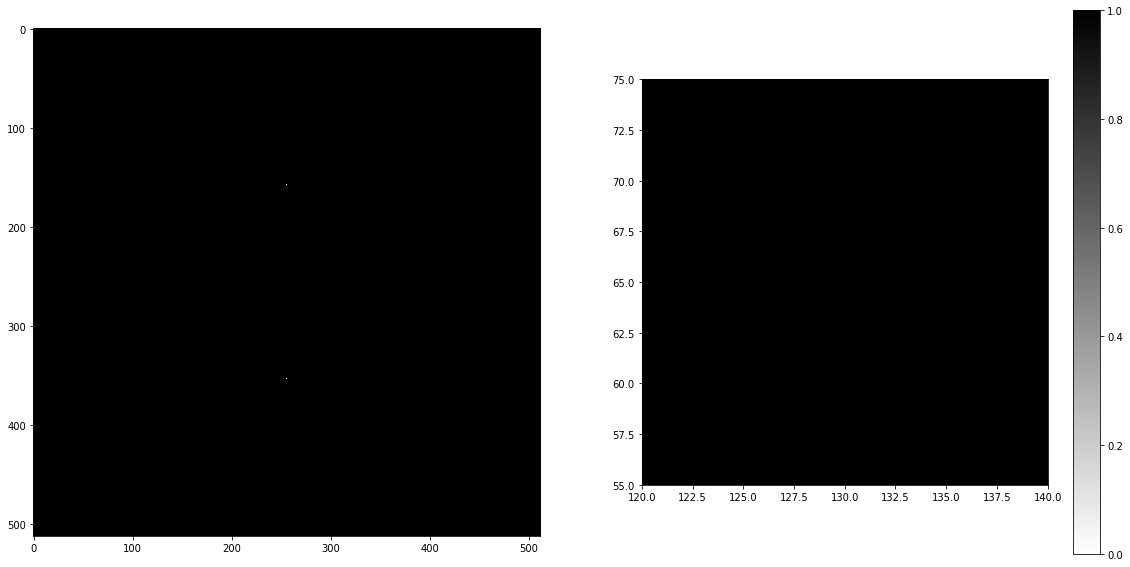

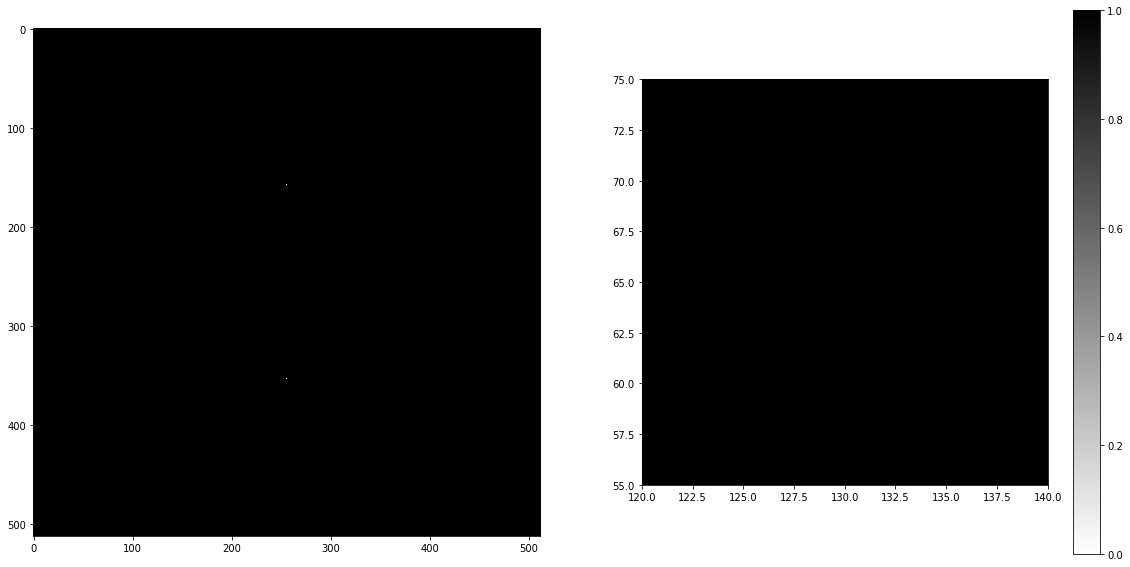

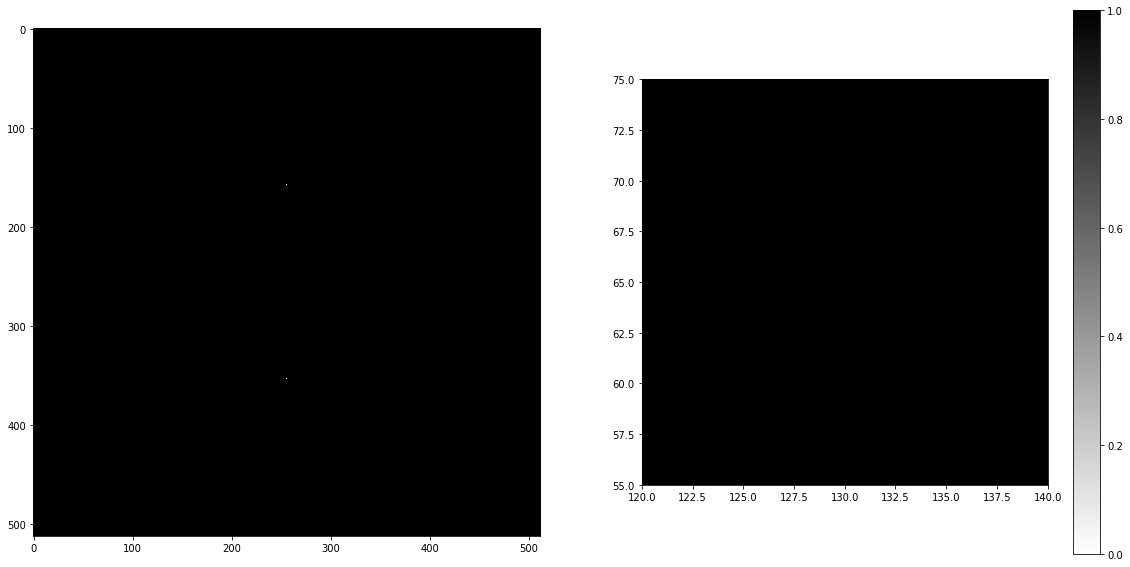

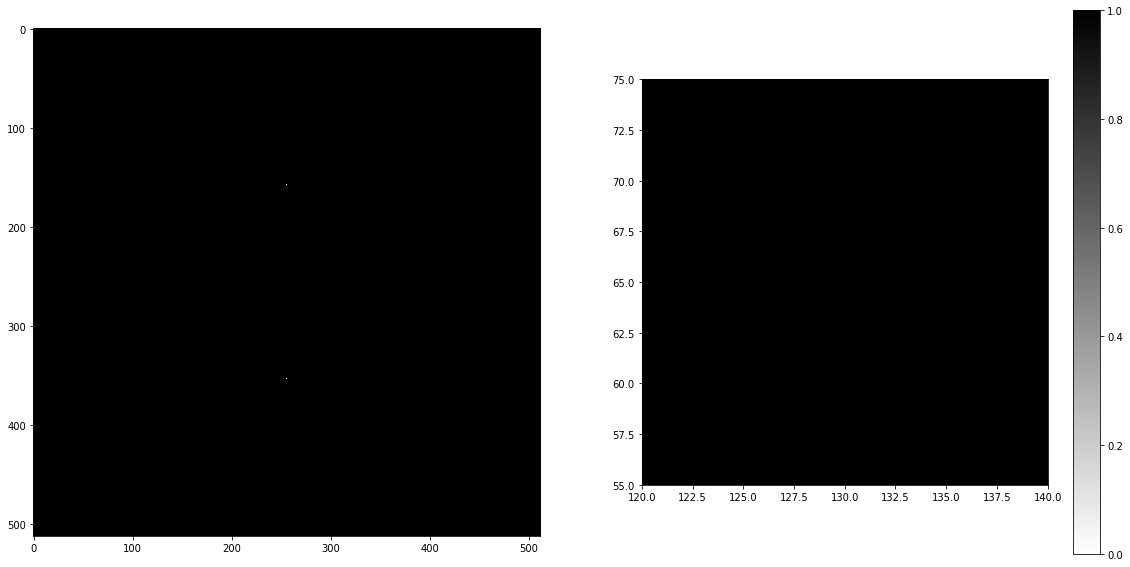

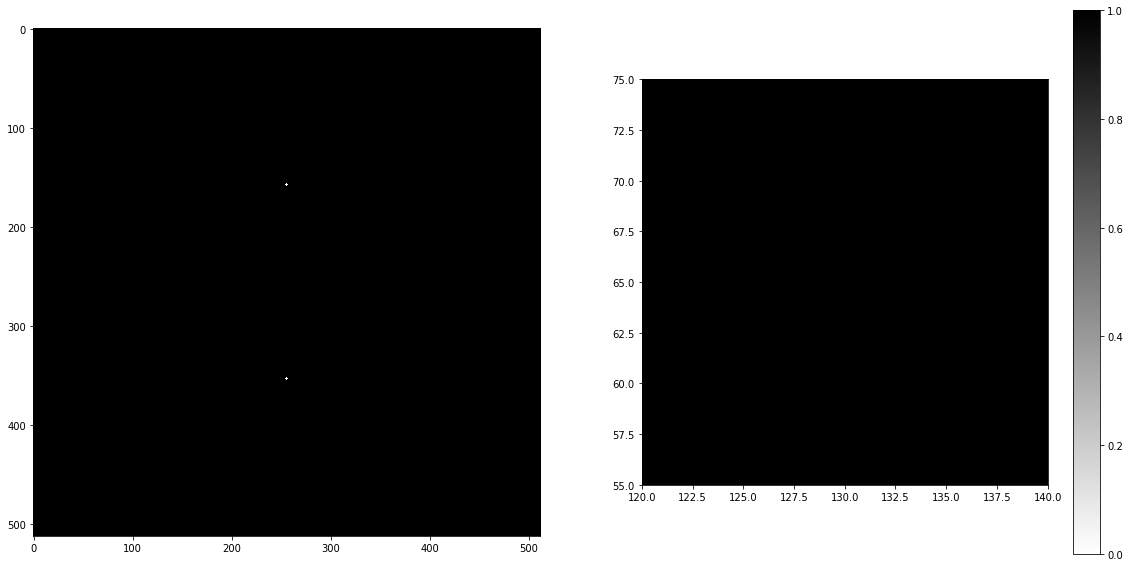

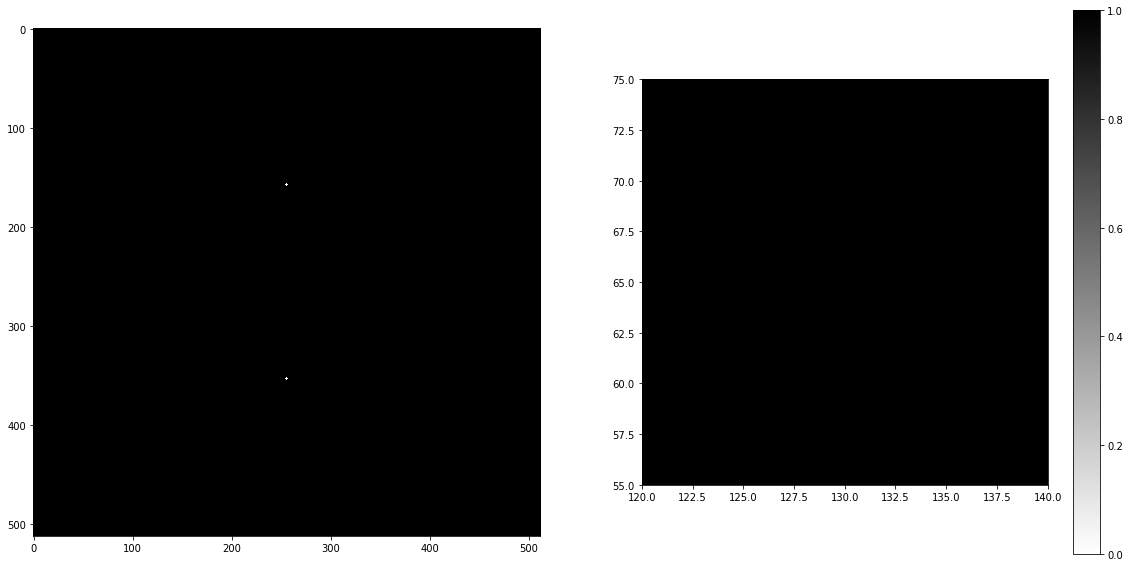

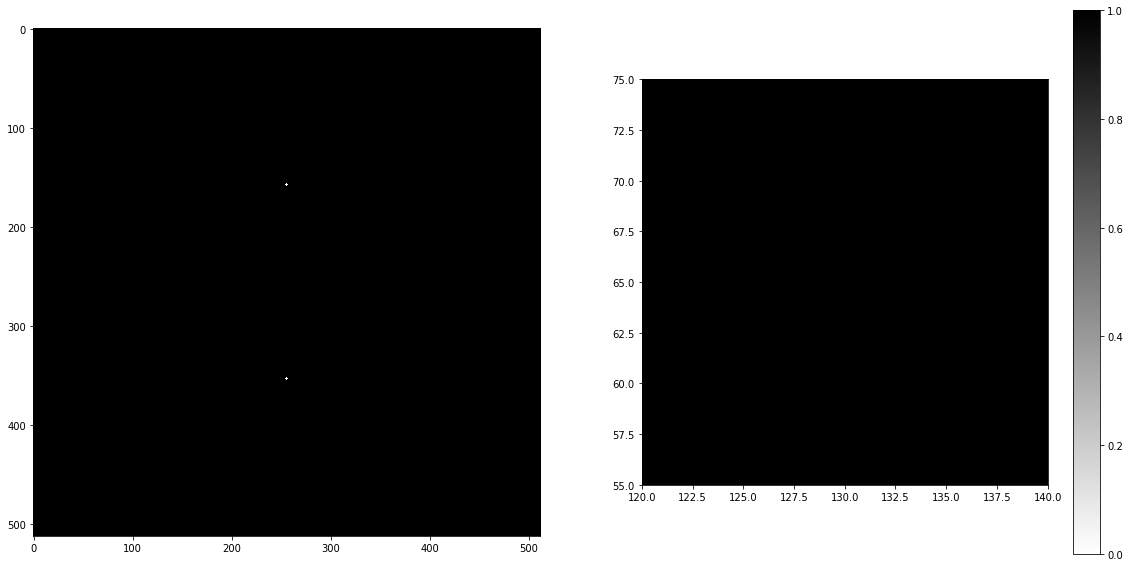

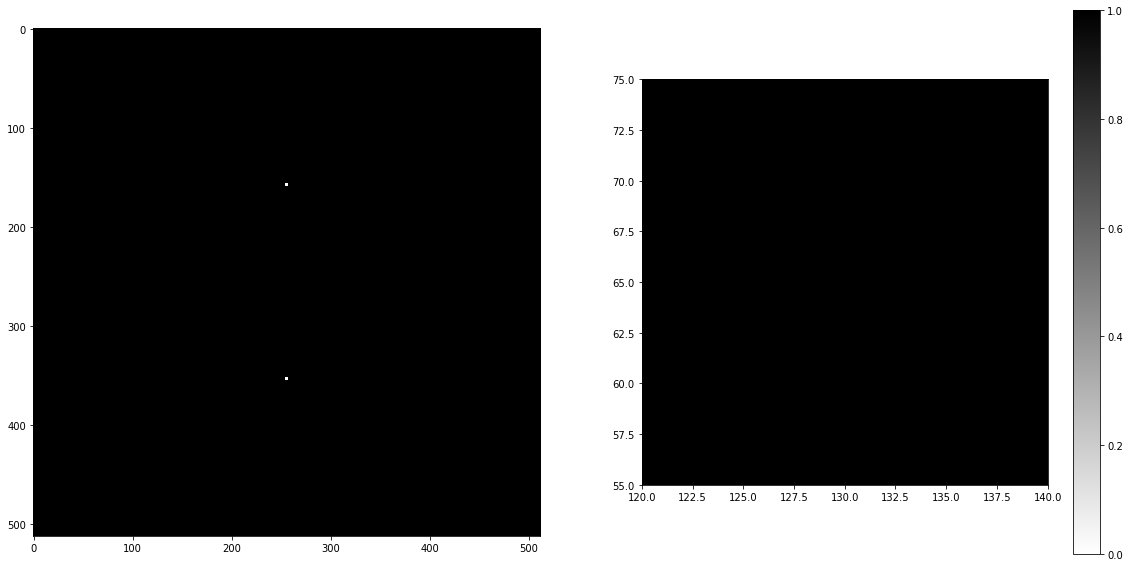

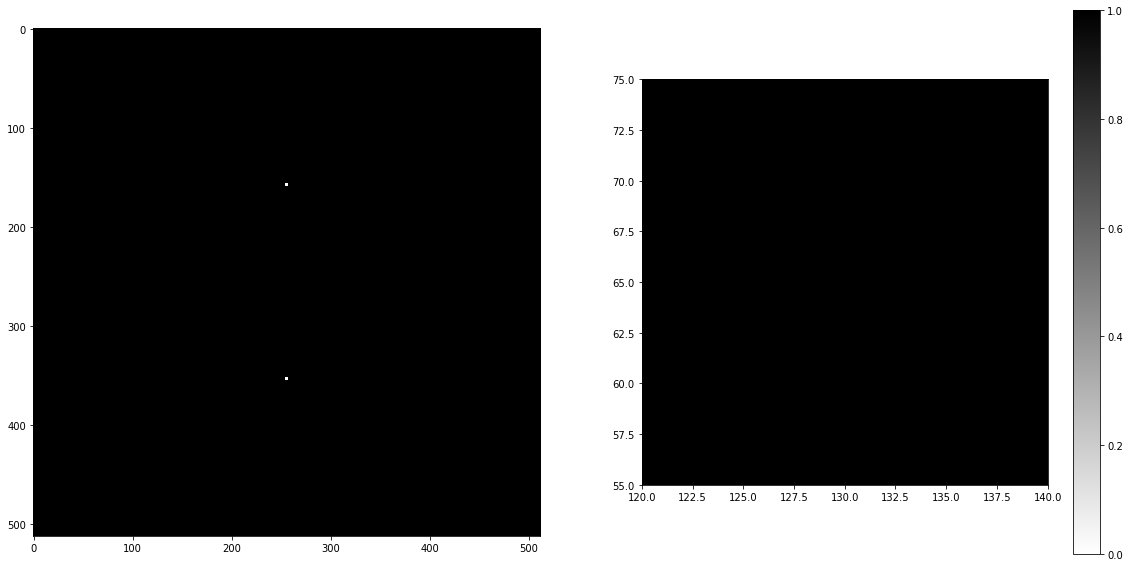

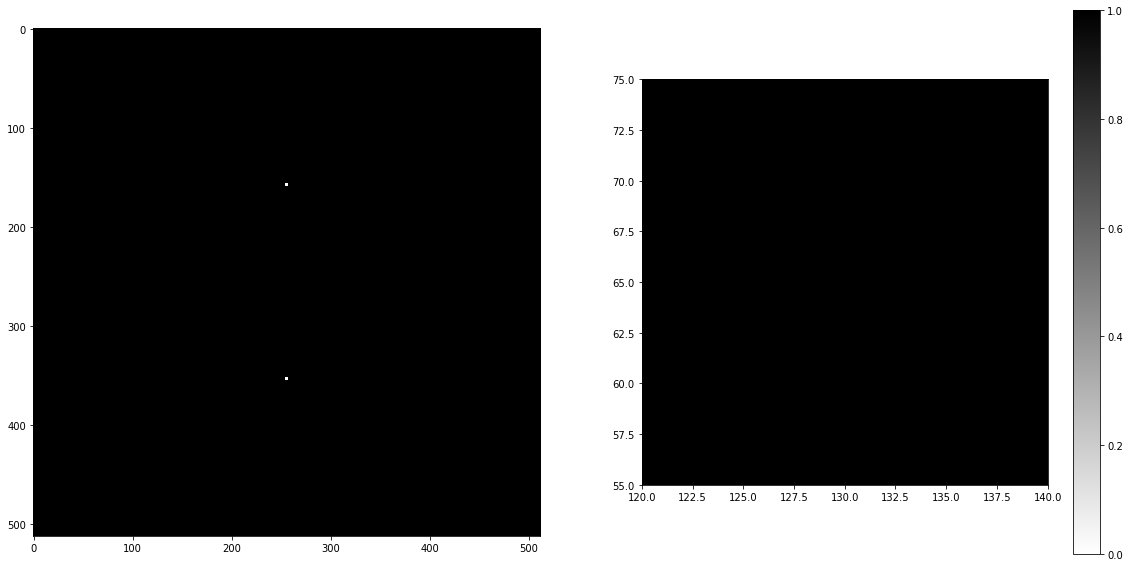

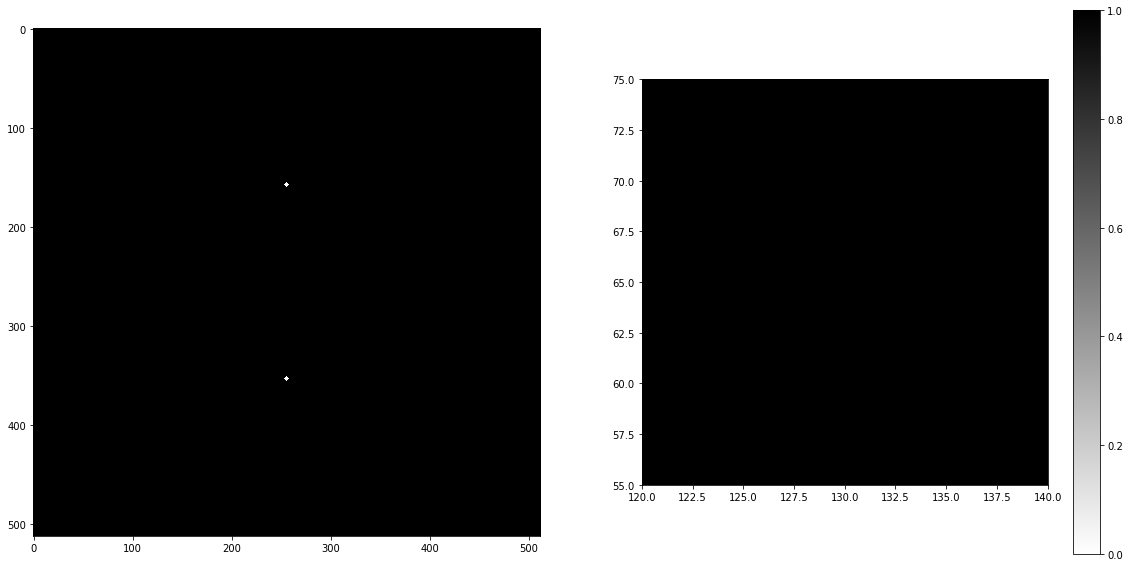

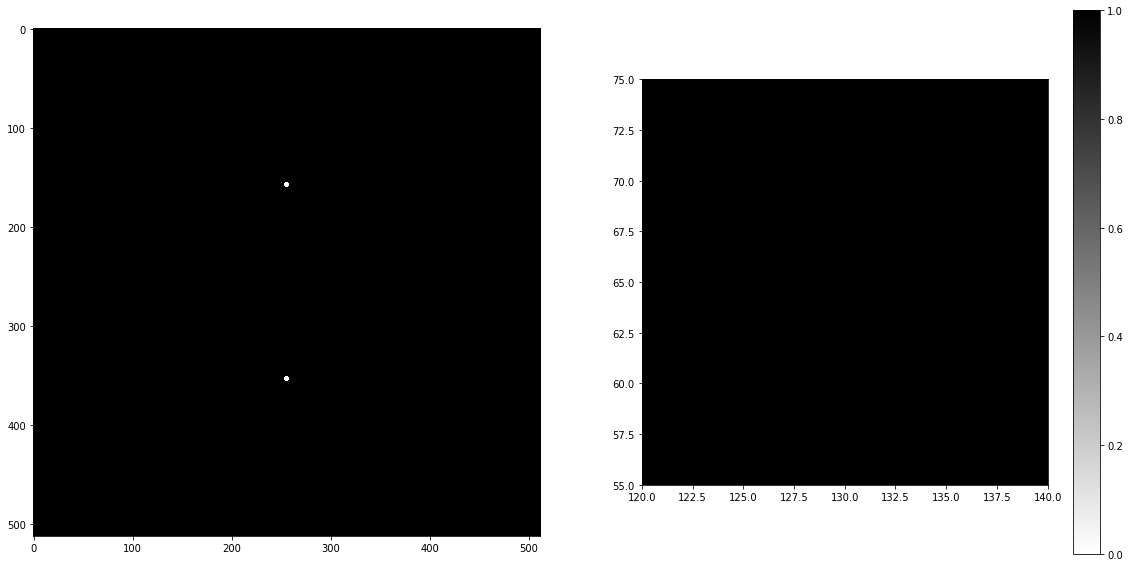

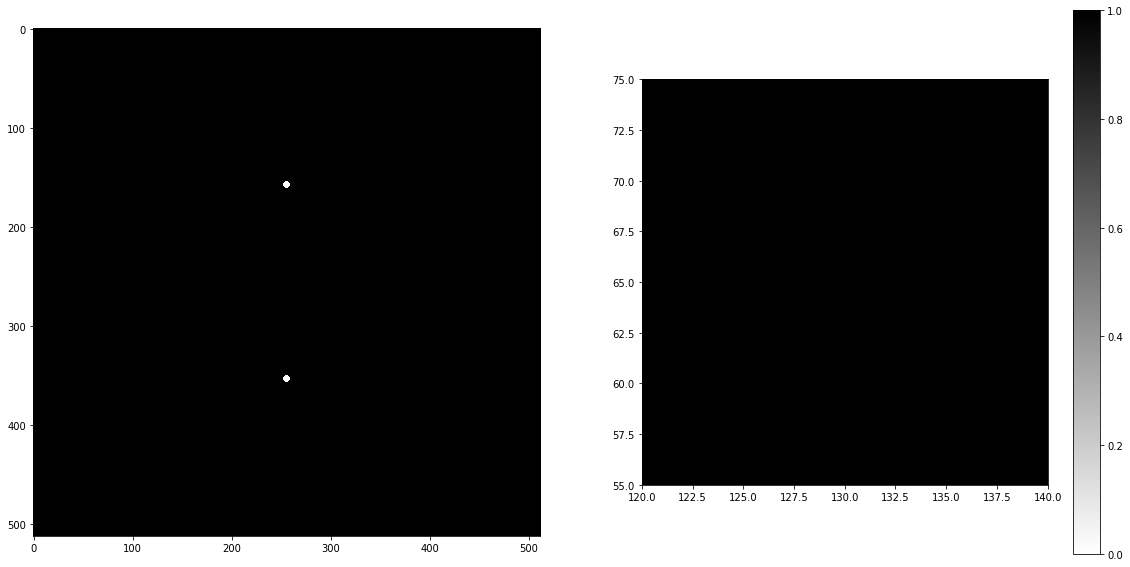

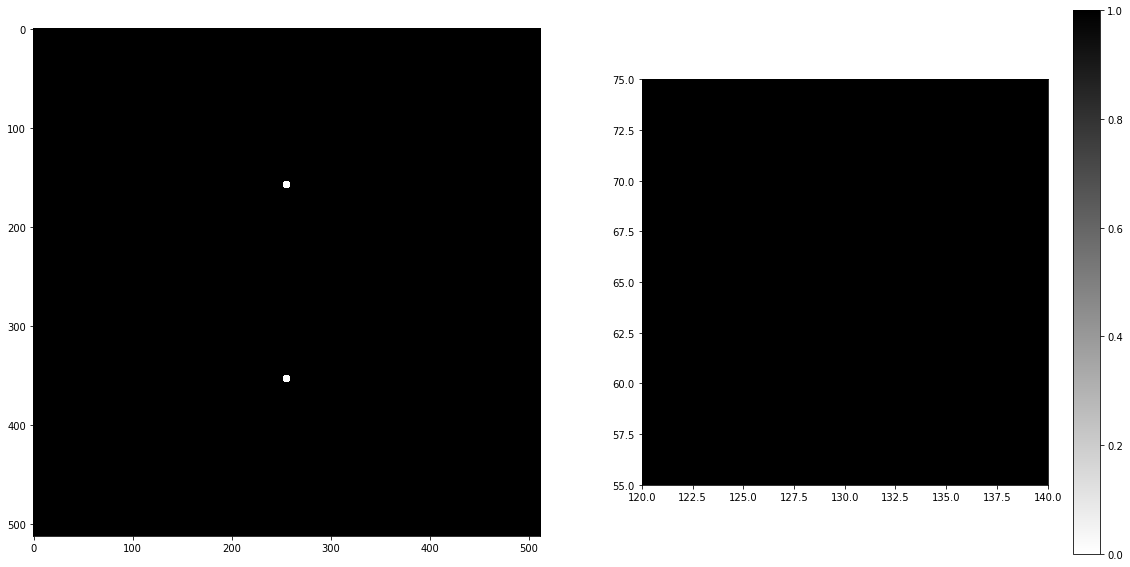

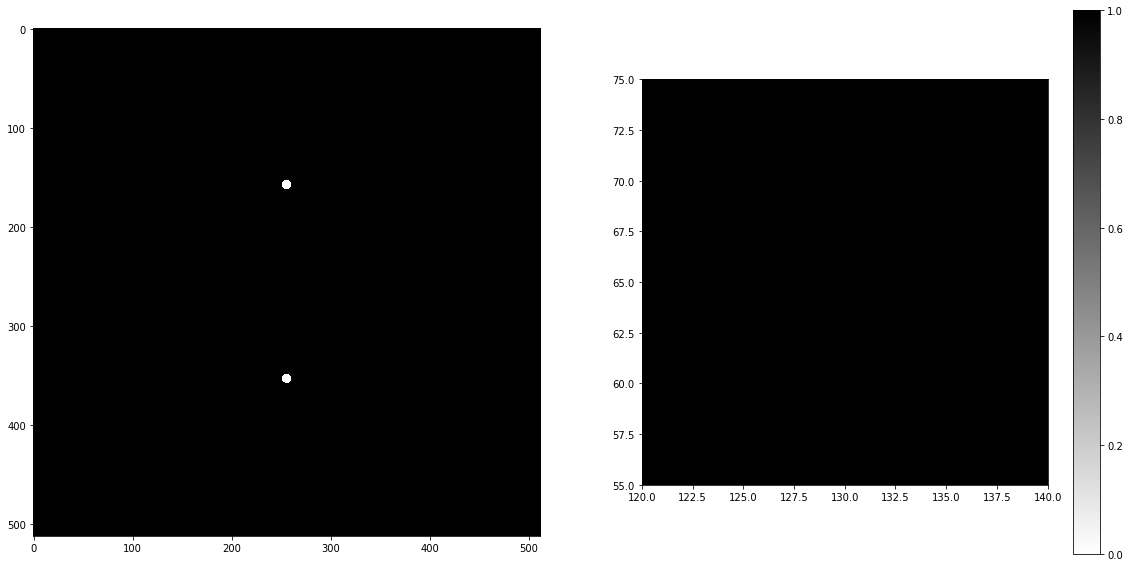

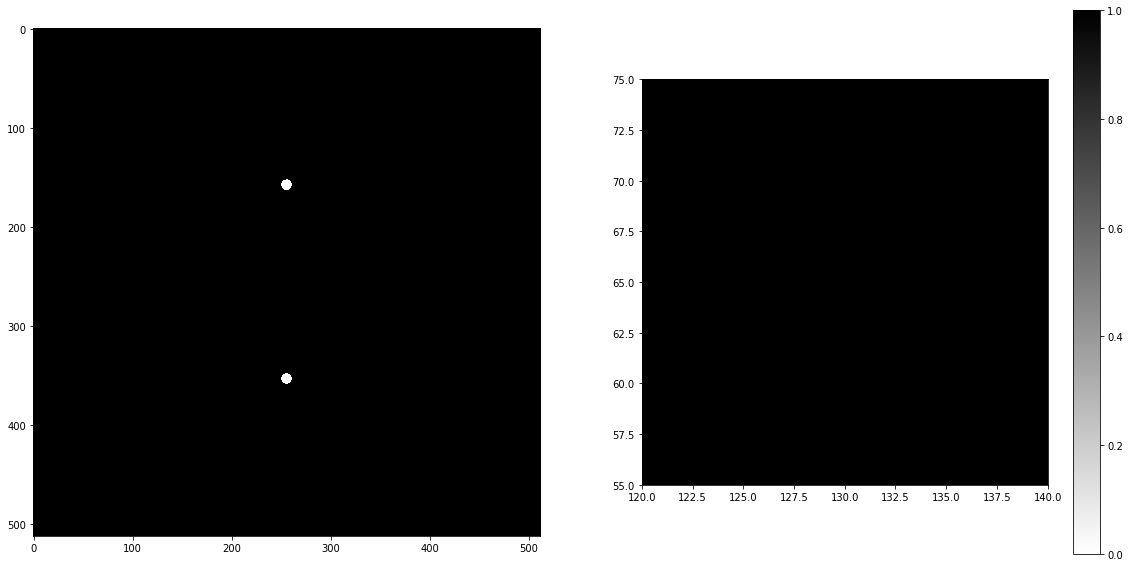

In [629]:
for st in lis:
    if (st[:3] == "W_R" ):
        a=pa.gm(f[mid],'slice/map/'+st)
        fig,ax=plt.subplots(1,2)
        ax[0].imshow(a,cmap='binary')
        im = ax[1].imshow(a,cmap='binary') ; fig.colorbar(im,ax=ax[1])
        ax[1].set_xlim([120,140]) ; ax[1].set_ylim([55,75])
        plt.show()

1 - Data look reasonable

2 - Calibration in the perpendicular plane

3 - statistical calibration with length * pi * r^2

4 - Calibration with length and W0

5 - Calibration with string Length

In [662]:
rsize = np.array([0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.5,4,5,6,7,8,9])
rsize/msa

array([0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75, 3.  ,
       3.5 , 4.  , 5.  , 6.  , 7.  , 8.  , 9.  ])

In [663]:
# the Ft0 is the sum mask
# we then square it and multiply it by L3/N6
renorm=(pa.gm(f[mid],'sizeN')**6/pa.gm(f[mid],'L')**3)

sL = pa.gm(f[mid],'stringN')*2/3
print("String length is %f"%(sL))
print("Initial intended was %f"%(2*np.pi*pa.gm(f[mid],'sizeN')/4))

# ma3D = pa.gm(f[mid],'sizeN')**3 - np.sqrt(pa.gm(f[mid],'mspW_Dif_0.50')[0]*renorm)
ma3D = np.sqrt(pa.gm(f[mid],'mspW_Red_2.00')[0]*renorm)
print(ma3D,ma3D/pa.gm(f[mid],'sizeN')**3)
print('Circular case: Points per Unit length = ma3D/(2 pi N/4) = %f'%(ma3D/(np.pi*pa.gm(f[mid],'sizeN')/2)))


String length is 524.000000
Initial intended was 804.247719
6685.0 4.980713129043579e-05
Circular case: Points per Unit length = ma3D/(2 pi N/4) = 8.312116


In [664]:
pa.gm(f[mid],'stDens')

0.011119144462670384

In [665]:
pusR=[]
for st in lis:
    if (st[:3] == "W_R" ):
        a=pa.gm(f[mid],'slice/map/'+st)
        ma3D = np.sqrt(pa.gm(f[mid],'msp'+st)[0]*renorm)
        sL = pa.gm(f[mid],'stringN')*2/3
        pusR.append([(a == 0).sum(),ma3D/(sL)])
        
pusR=np.array(pusR)

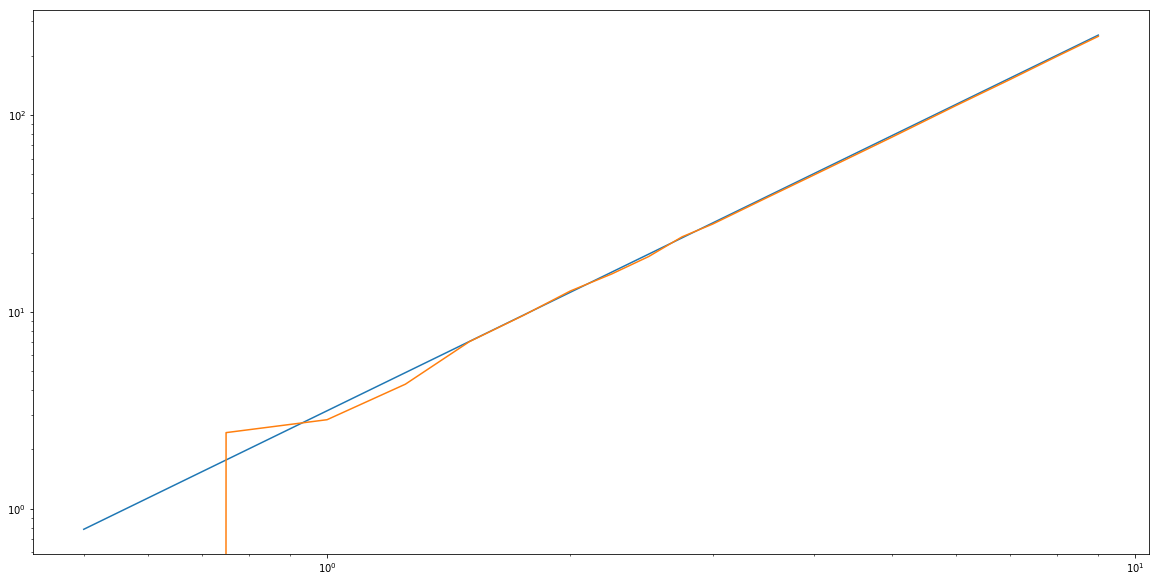

In [666]:
plt.loglog(rsize,np.pi*(rsize/msa)**2)
# plt.loglog(rsize,pusR[:,0])
plt.loglog(rsize,pusR[:,1])

In [667]:
# The calibration is perfect already
# naturally it is not very good for small r

Text(0.5, 0, 'rmask [lattice units]')

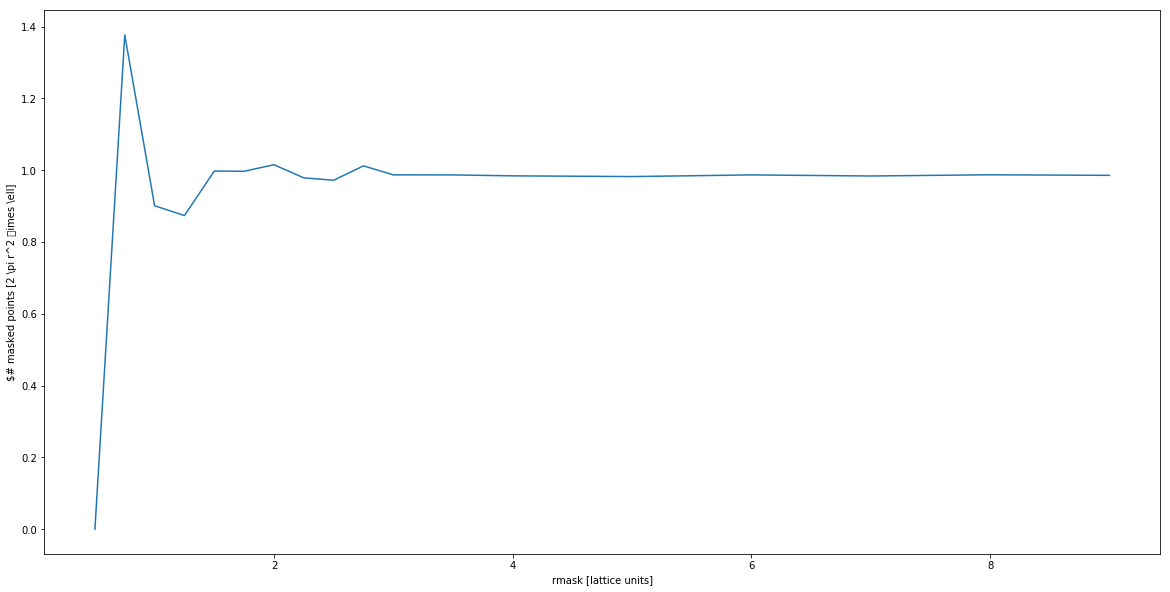

In [668]:
# plt.plot(rsize/msa,pusR[:,0]/(2*np.pi*(rsize/msa)**2))
plt.plot(rsize/msa,pusR[:,1]/(np.pi*(rsize/msa)**2))
plt.ylabel('$# masked points [2 \pi r^2 \times \ell]')
plt.xlabel('rmask [lattice units]')

# For all values of time

In [669]:
f

array(['out/m/axion.m.00000', 'out/m/axion.m.00001',
       'out/m/axion.m.00002', 'out/m/axion.m.00003',
       'out/m/axion.m.00004', 'out/m/axion.m.00005',
       'out/m/axion.m.00006', 'out/m/axion.m.00007',
       'out/m/axion.m.00008', 'out/m/axion.m.00009',
       'out/m/axion.m.00010', 'out/m/axion.m.00011',
       'out/m/axion.m.00012', 'out/m/axion.m.00013',
       'out/m/axion.m.00014', 'out/m/axion.m.00015',
       'out/m/axion.m.00016', 'out/m/axion.m.00017',
       'out/m/axion.m.00018', 'out/m/axion.m.00019',
       'out/m/axion.m.00020', 'out/m/axion.m.00021',
       'out/m/axion.m.00022', 'out/m/axion.m.00023',
       'out/m/axion.m.00024'], dtype='<U19')

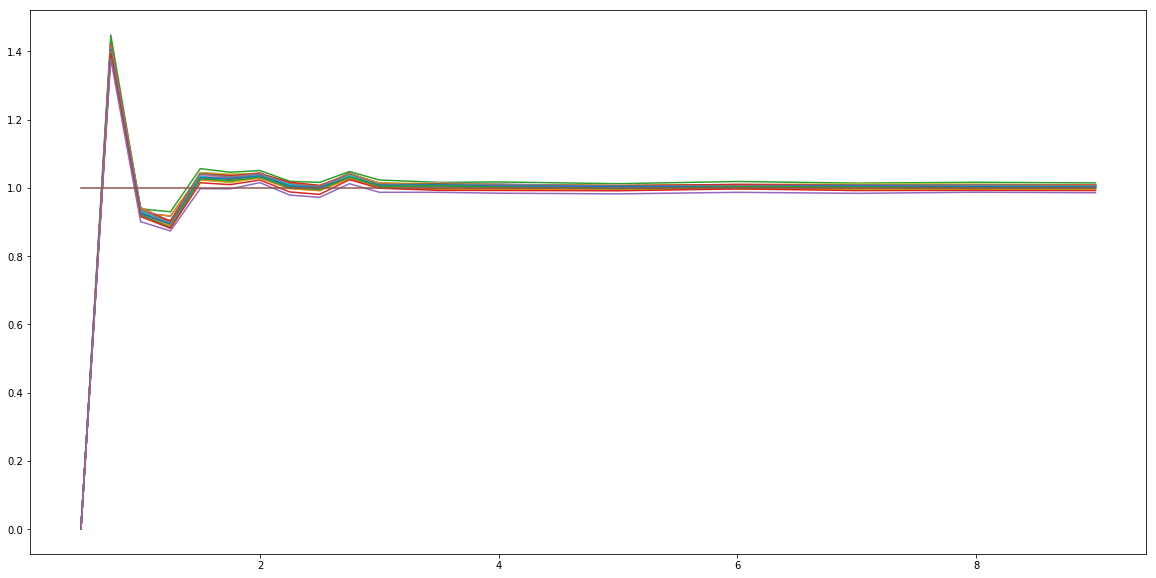

In [638]:
mpusR=[]
for i in range(len(f)):
    pusR=[]
    for st in lis:
        if (st[:3] == "W_R" ):
            a=pa.gm(f[i],'slice/map/'+st)
            ma3D = np.sqrt(pa.gm(f[i],'msp'+st)[0]*renorm)
            sL = pa.gm(f[i],'stringN')*2/3
            pusR.append([(a == 0).sum(),ma3D/(sL)])


    mpusR.append(pusR)
mpusR=np.array(mpusR)

for pusR in mpusR:
#     plt.plot(rsize/msa,pusR[:,0]/(2*np.pi*(rsize/msa)**2))
    plt.plot(rsize/msa,pusR[:,1]/(np.pi*(rsize/msa)**2))
plt.plot(rsize/msa,rsize/rsize)

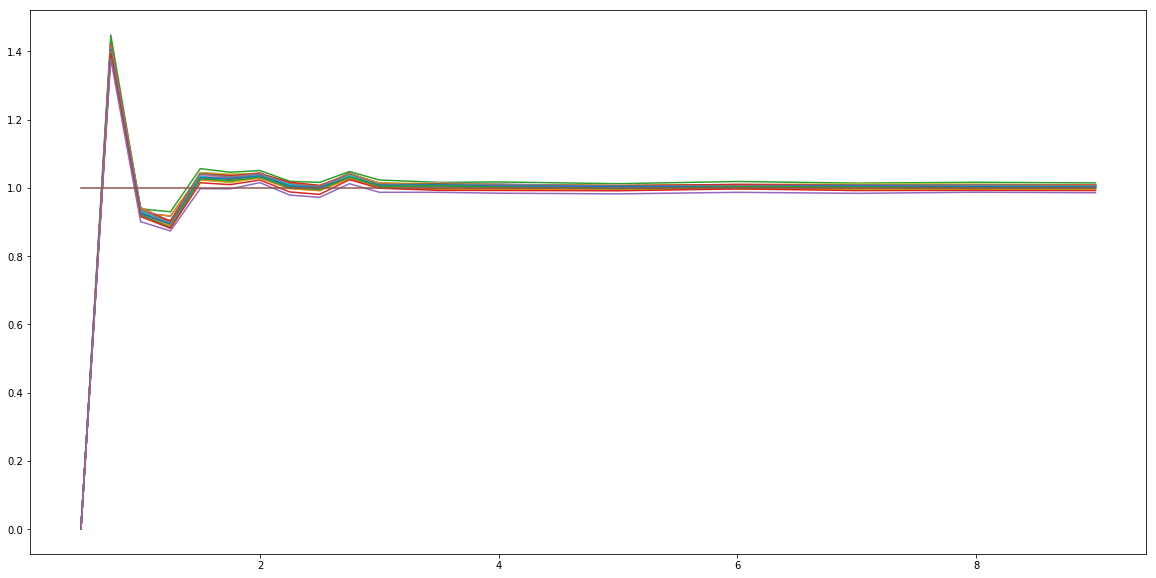

In [639]:
for pusR in mpusR:
#     plt.plot(rsize/msa,pusR[:,0]/(2*np.pi*(rsize/msa)**2))
    plt.plot(rsize/msa,pusR[:,1]/(np.pi*(rsize/msa)**2))
plt.plot(rsize/msa,rsize/rsize)

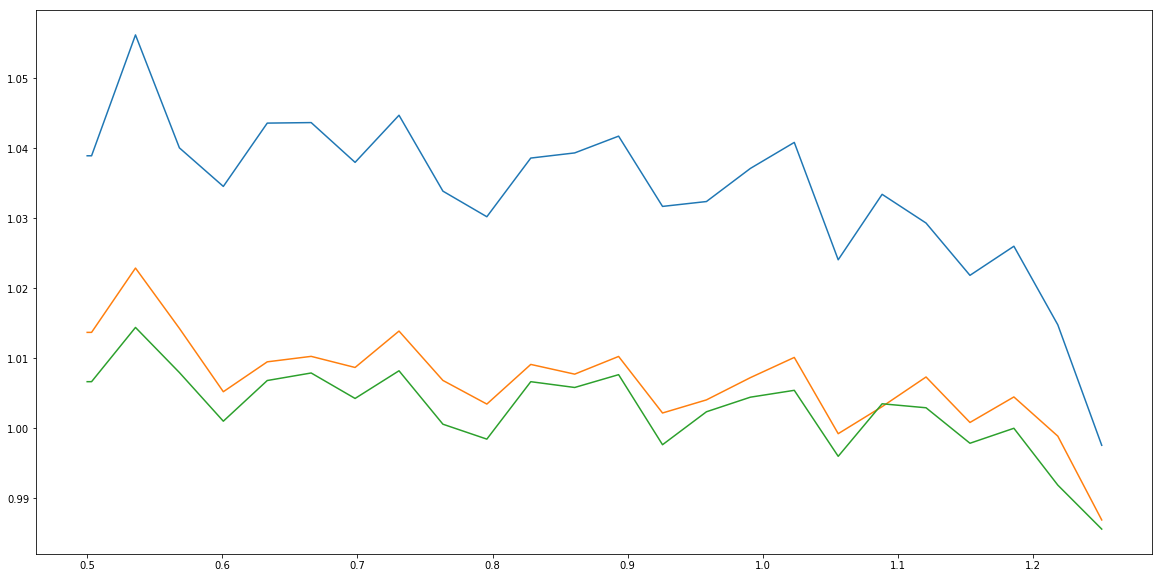

In [640]:
for ir in [4,10,-1]:
    plt.plot(ct,mpusR[:,ir,1]/(np.pi*(rsize[ir]/msa)**2))

# Gau

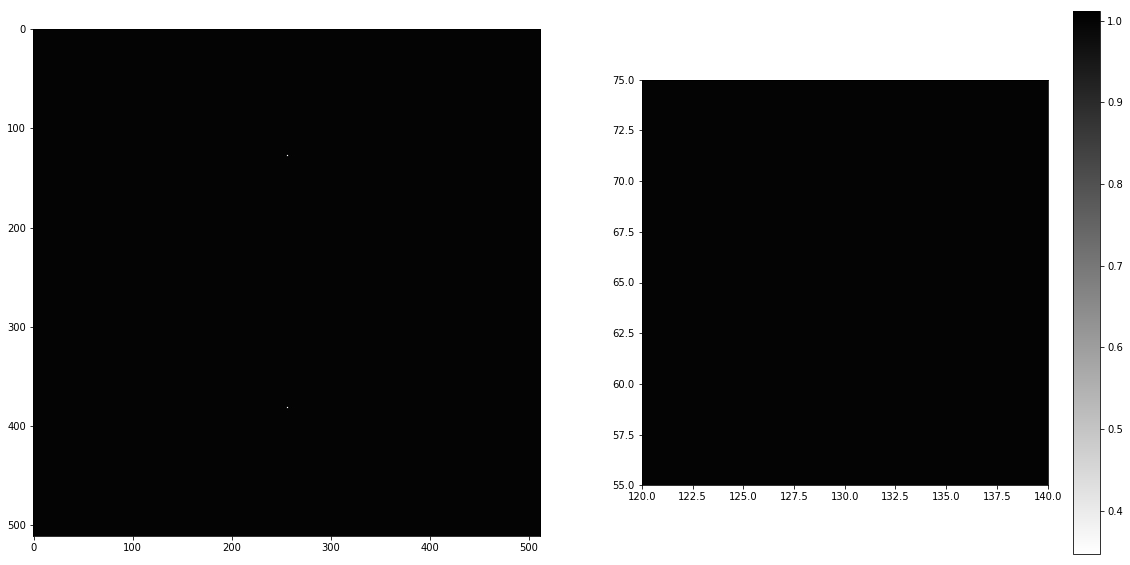

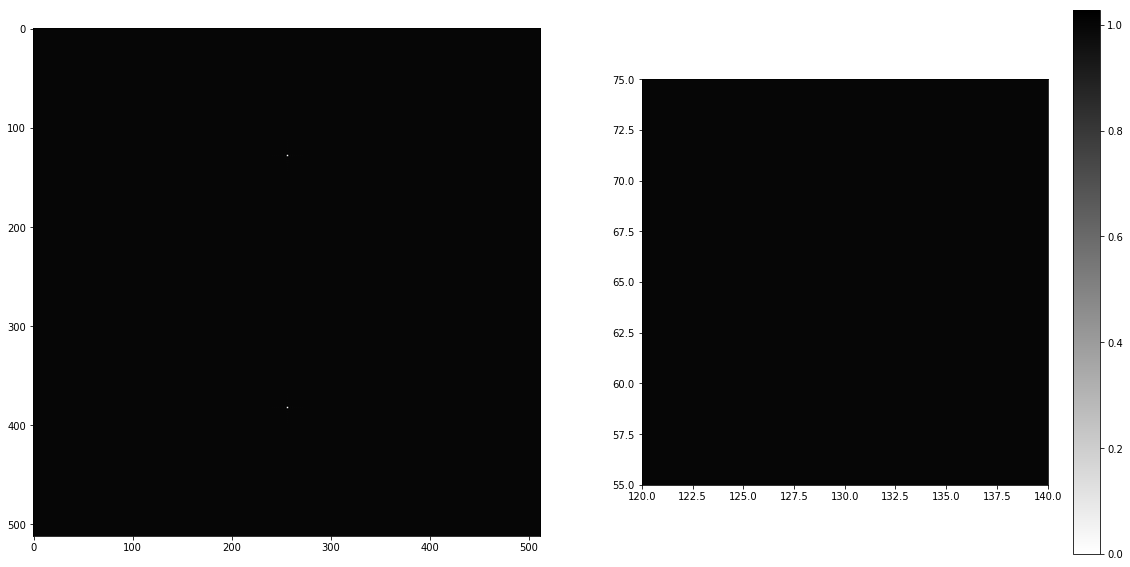

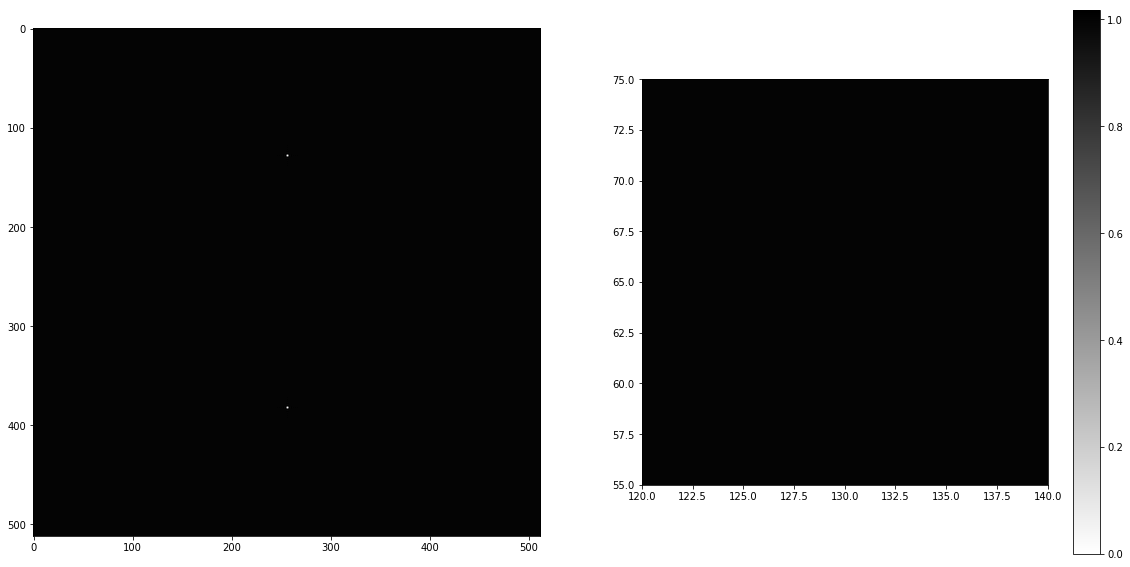

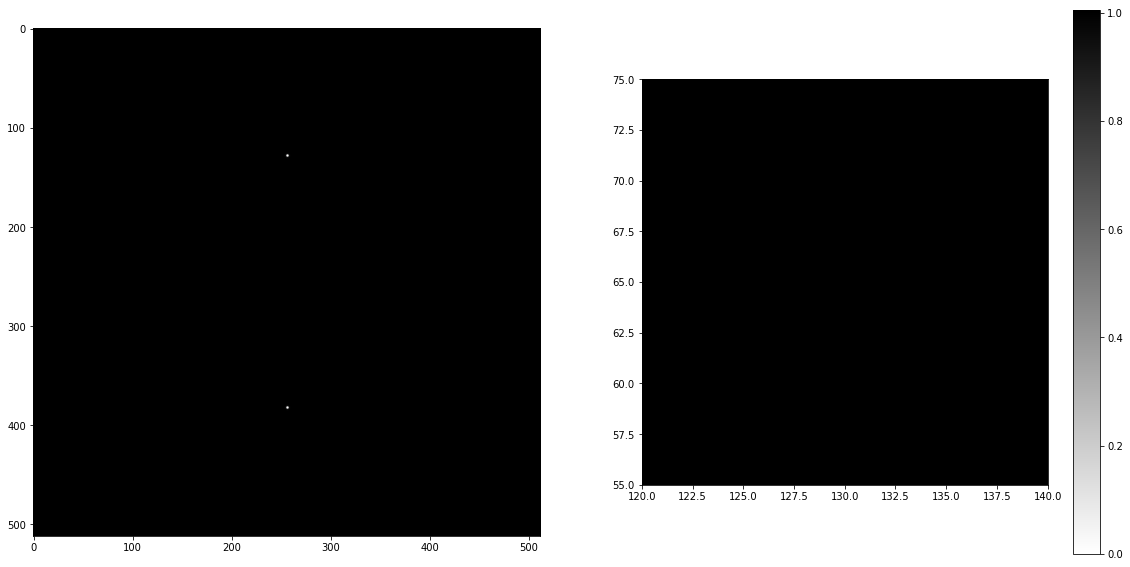

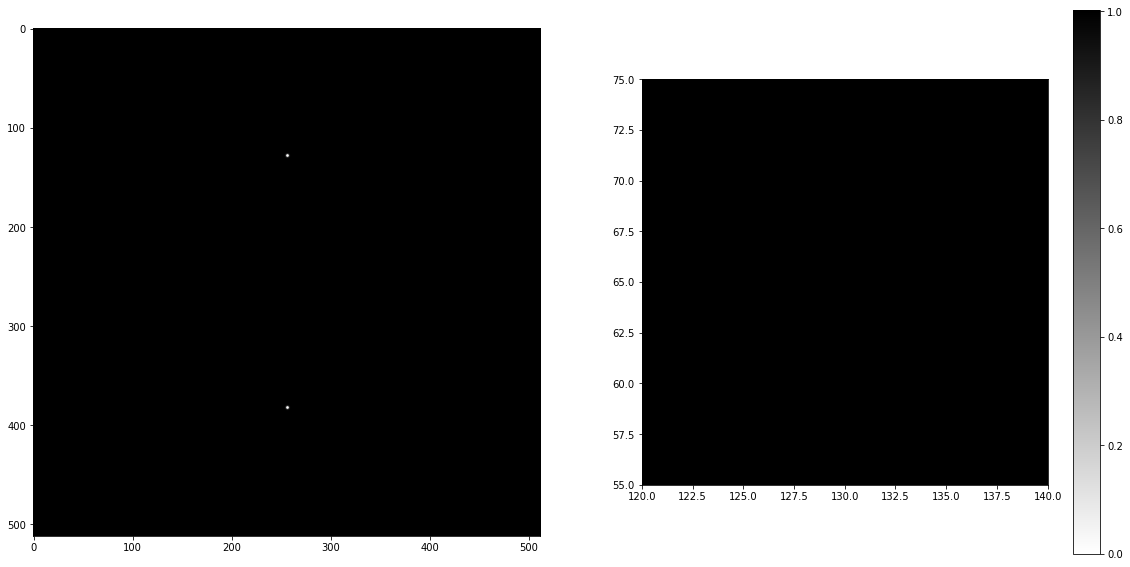

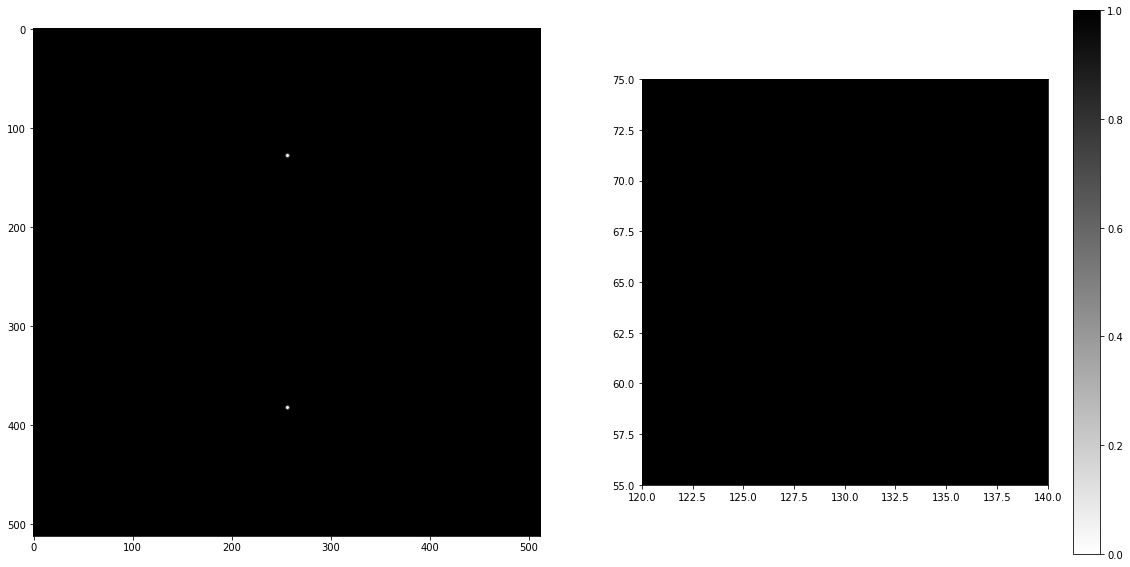

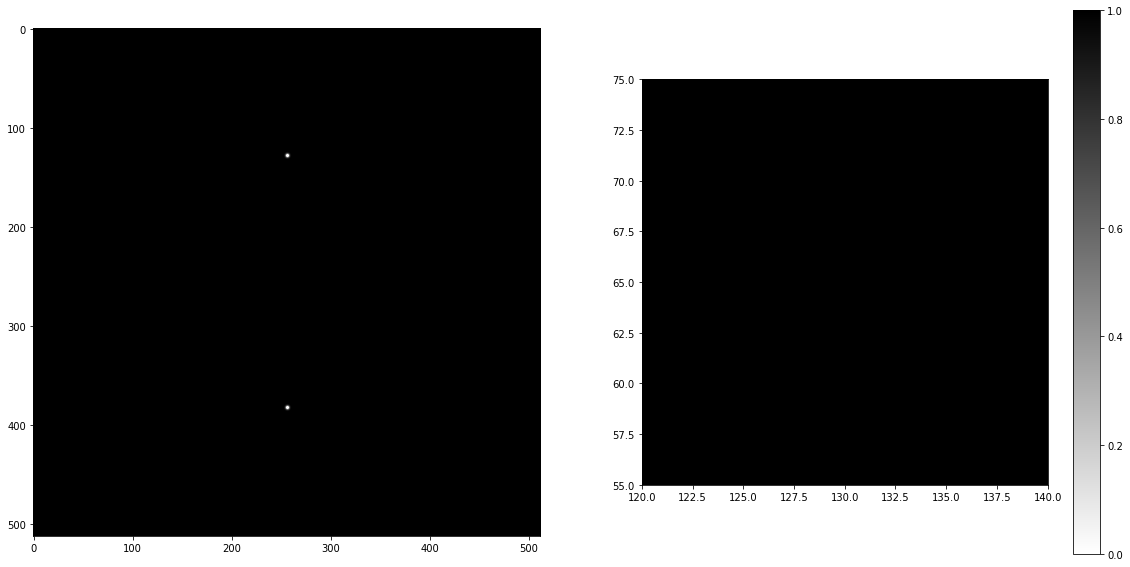

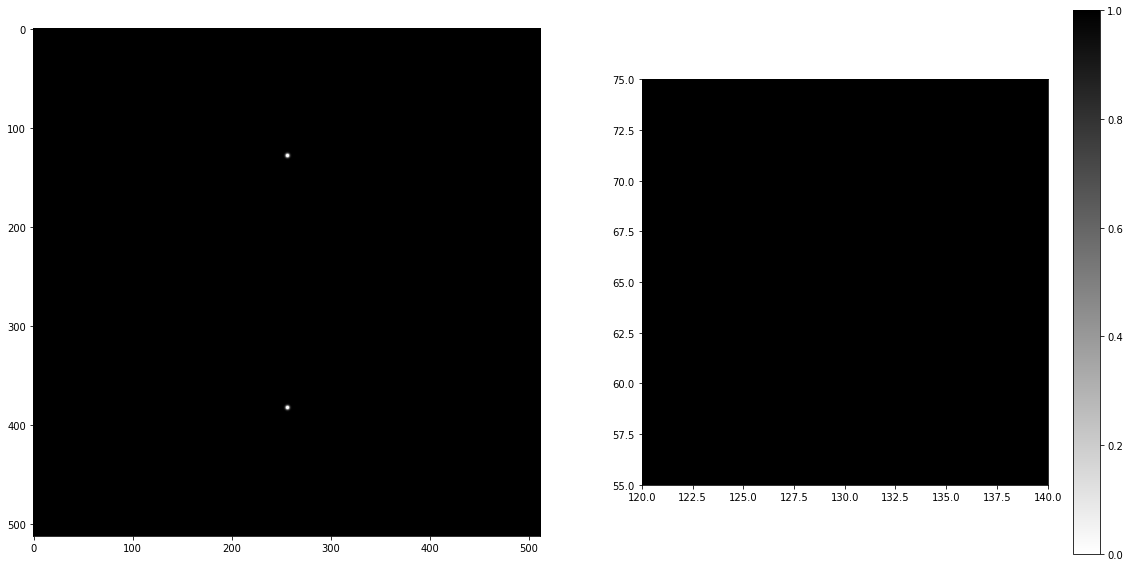

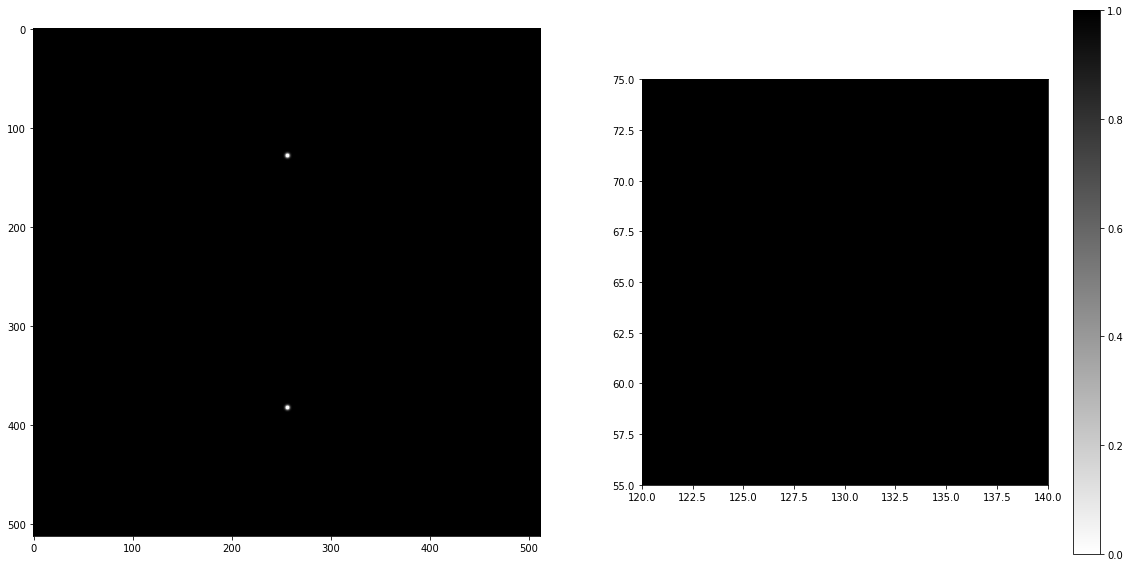

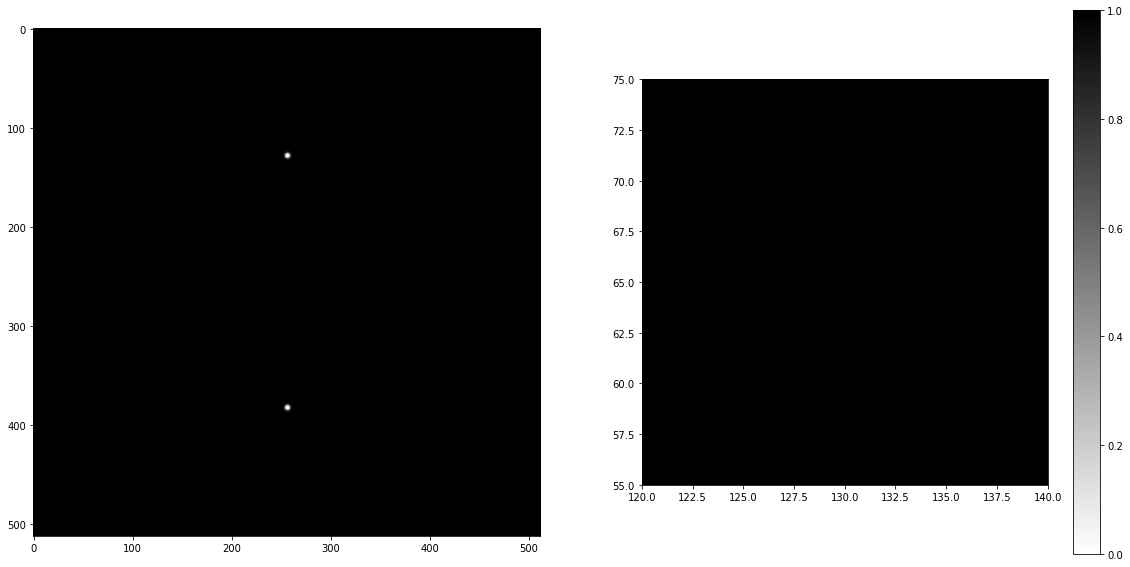

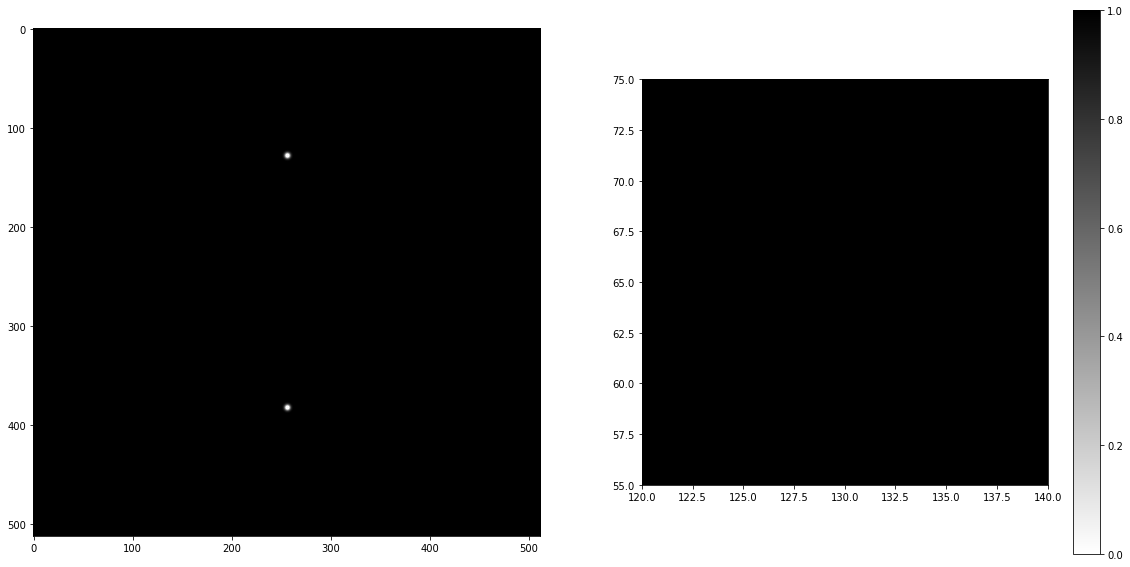

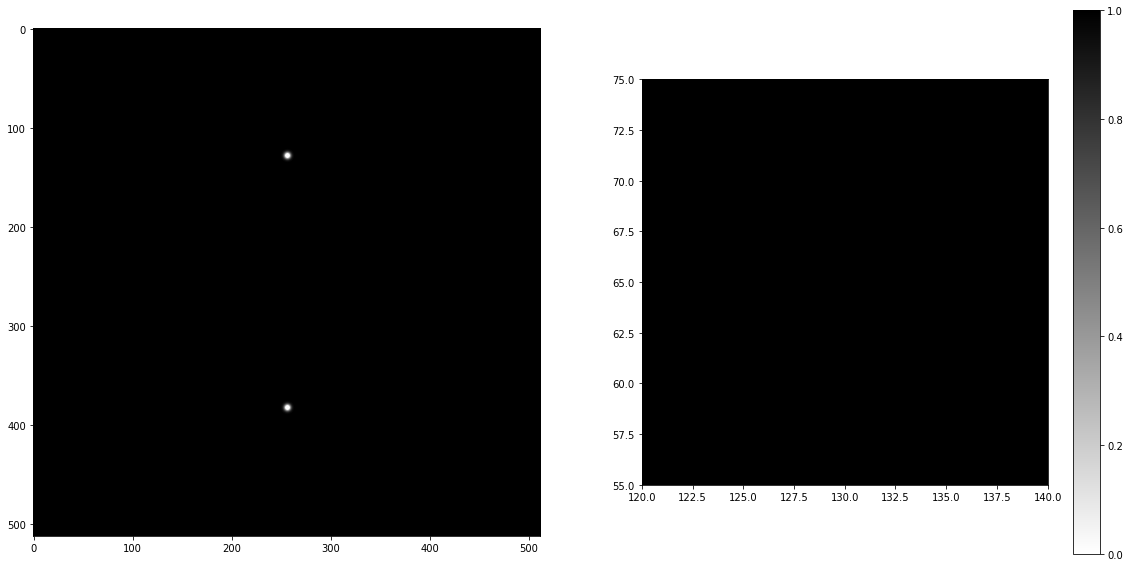

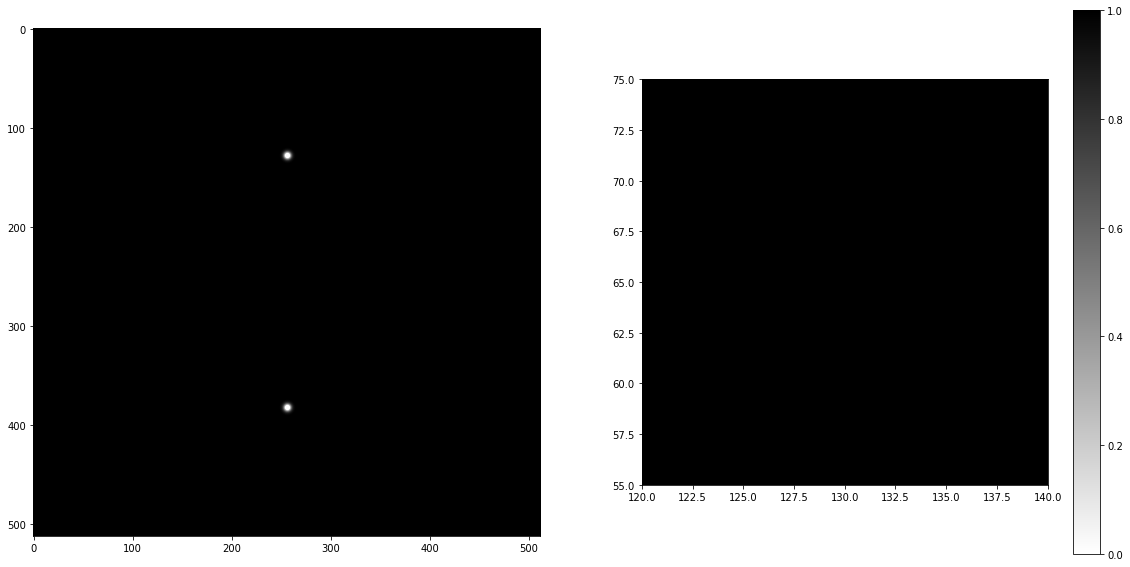

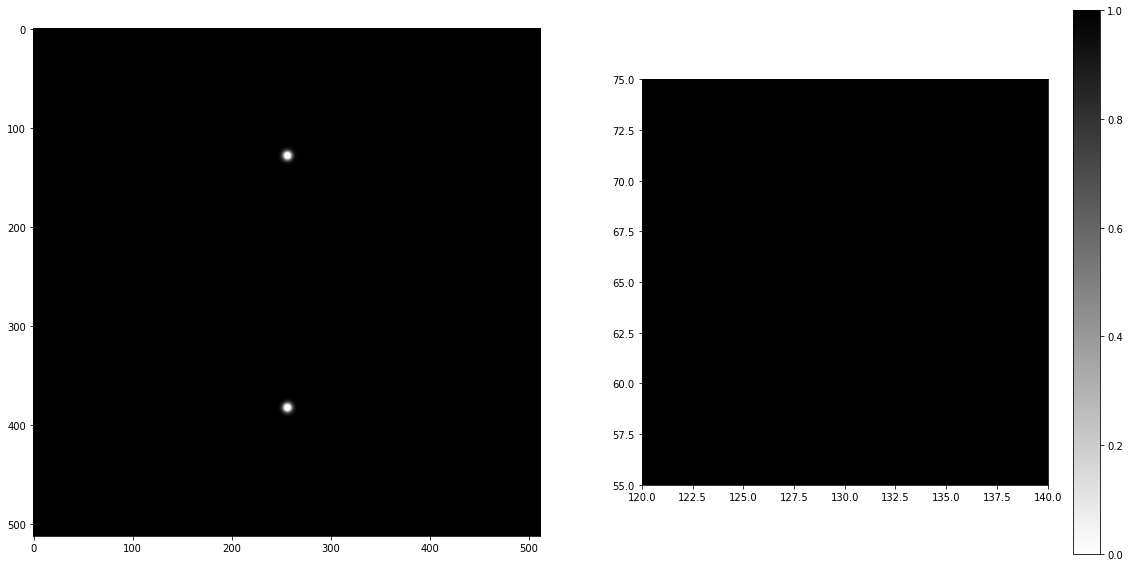

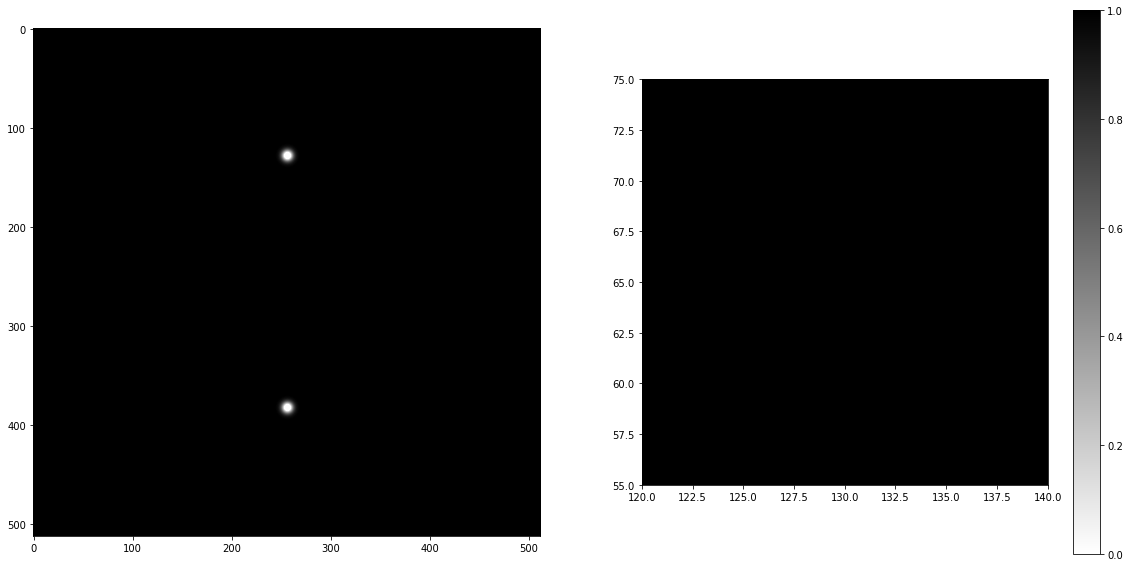

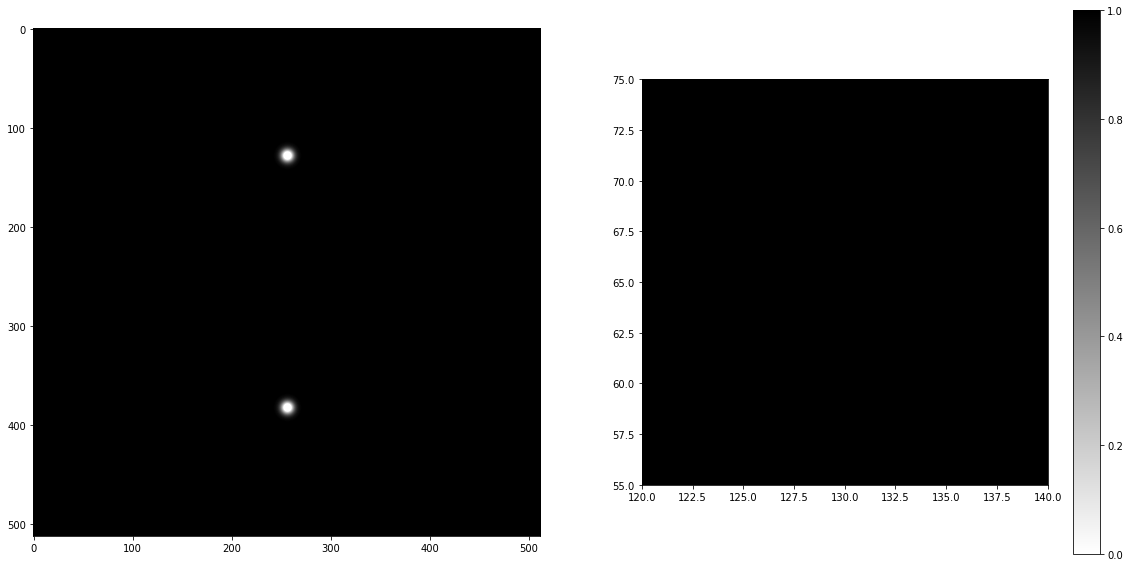

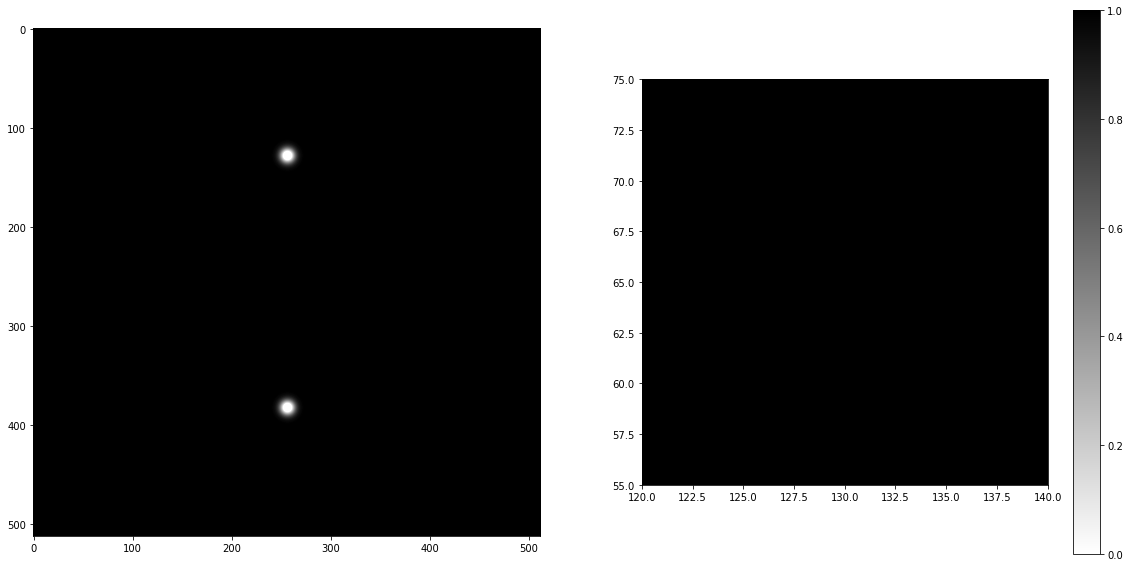

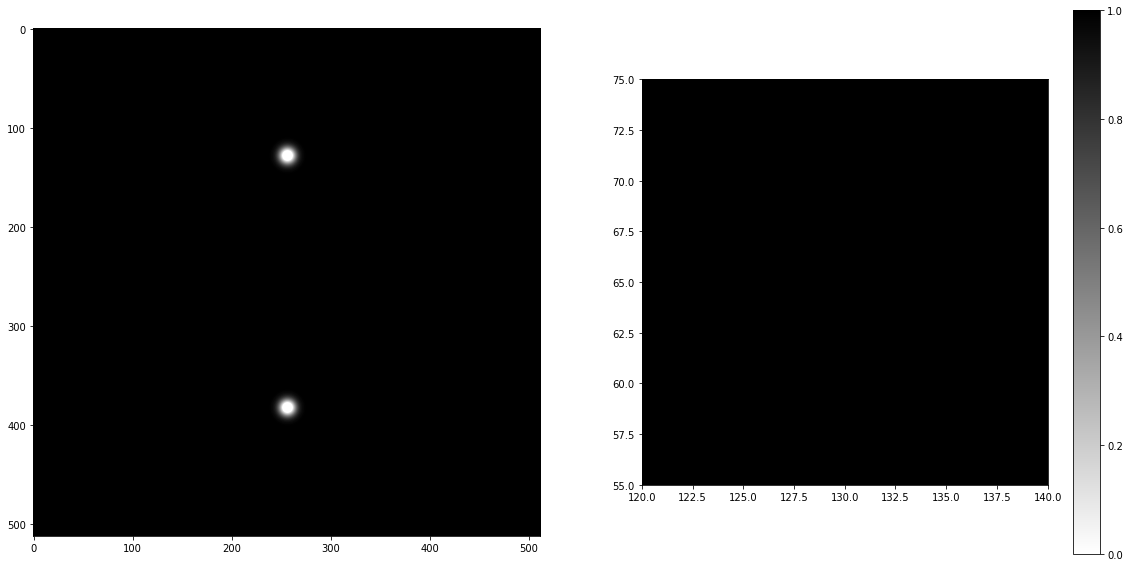

In [641]:
for st in lis:
    if (st[:3] == "W_G" ):
        a=pa.gm(f[mid],'slice/map/'+st)
        fig,ax=plt.subplots(1,2)
        ax[0].imshow(a,cmap='binary')
        im = ax[1].imshow(a,cmap='binary') ; fig.colorbar(im,ax=ax[1])
        ax[1].set_xlim([120,140]) ; ax[1].set_ylim([55,75])
        plt.show()

In [670]:
pusG=[];
for st in lis:
    if (st[:3] == "W_G" ):
        a=pa.gm(f[mid],'slice/map/'+st)
        ma3D = np.sqrt(pa.gm(f[mid],'msp'+st)[0]*renorm)
        sL = pa.gm(f[mid],'stringN')*2/3
        pusG.append([(a == 0).sum(),(1-a).sum(),ma3D/(sL)])
pusG=np.array(pusG)

(0.9, 1.1)

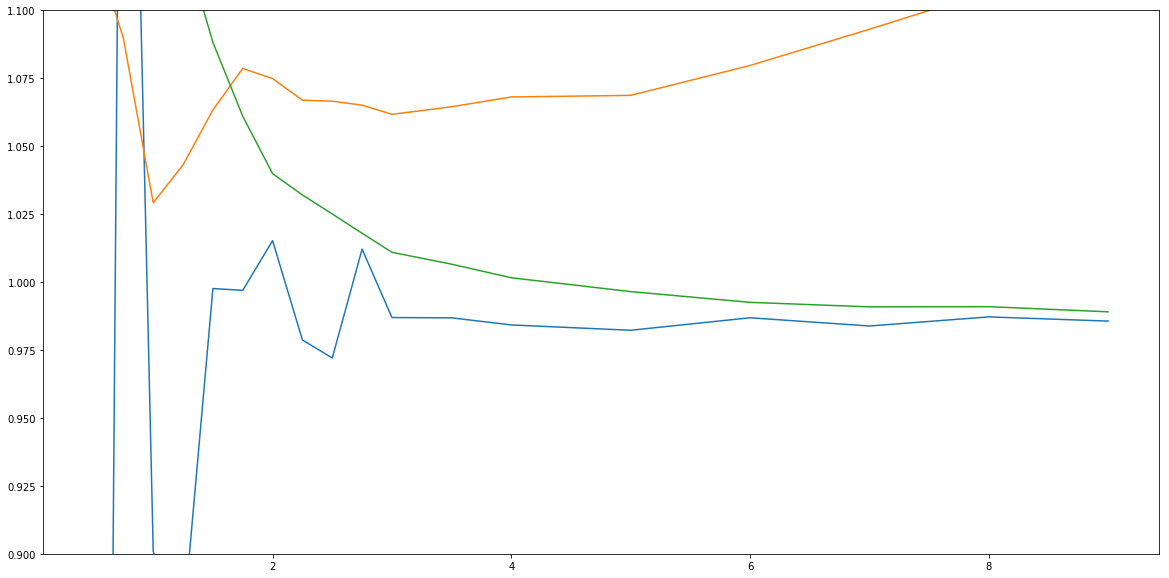

In [671]:
# REDO, Gau=Red, Gaus+tail
plt.plot(rsize/msa,pusR[:,1]/(np.pi*(rsize/msa)**2))
plt.plot(rsize/msa,pusG[:,1]/(2*np.pi*(rsize/msa)**2))
plt.plot(rsize/msa,pusG[:,2]/(1.93*np.pi*(rsize/msa)**2))
plt.ylim([0.9,1.1])

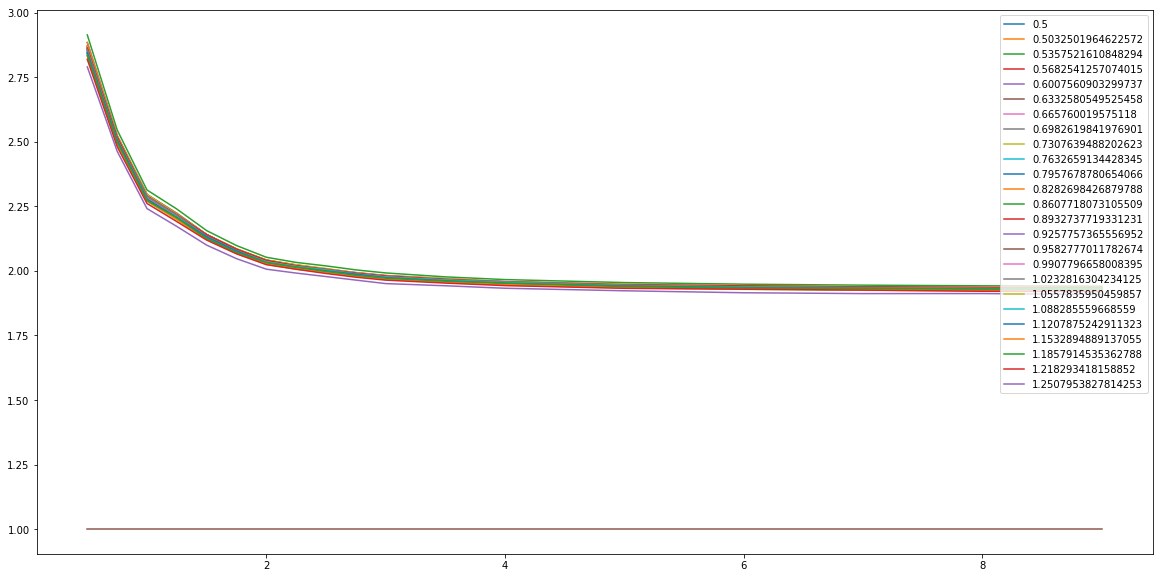

In [649]:
mpusG=[]
for i in range(len(f)):
    pusG=[]
    for st in lis:
        if (st[:3] == "W_G" ):
            a=pa.gm(f[i],'slice/map/'+st)
            ma3D = np.sqrt(pa.gm(f[i],'msp'+st)[0]*renorm)
            sL = pa.gm(f[i],'stringN')*2/3
            pusG.append([(a == 0).sum(),(1-a).sum(),ma3D/(sL)])
    mpusG.append(pusG)

mpusG=np.array(mpusG)

i=0
for pusG in mpusG:
#     plt.plot(rsize/msa,pusR[:,0]/(2*np.pi*(rsize/msa)**2))
    plt.plot(rsize/msa,pusG[:,2]/(np.pi*(rsize/msa)**2),label=ct[i])
    i=i+1
plt.plot(rsize/msa,rsize/rsize)
plt.legend()

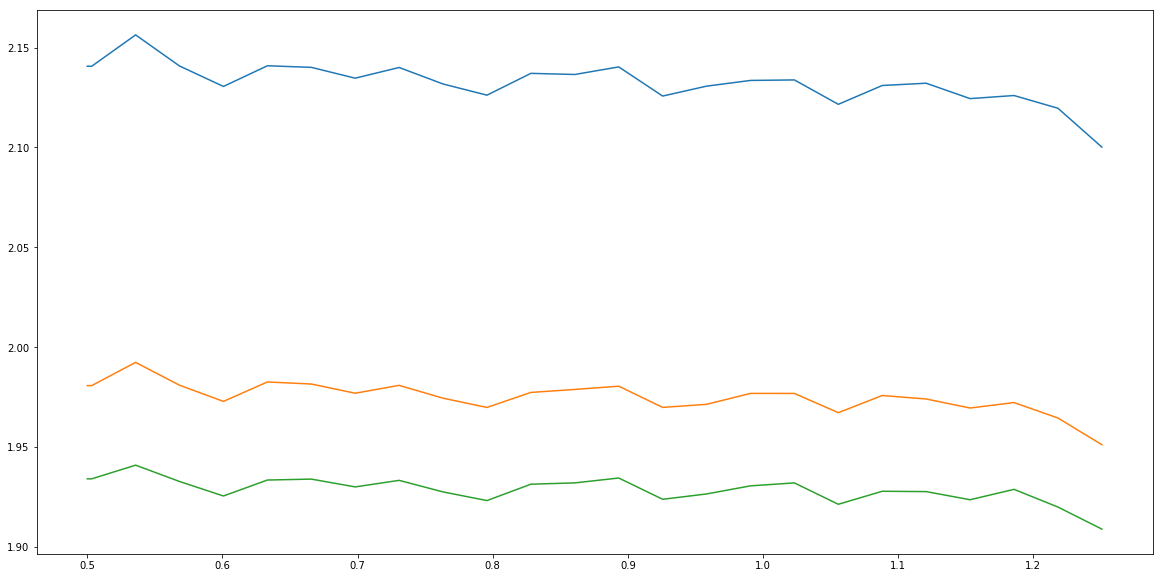

In [650]:
for ir in [4,10,-1]:
    plt.plot(ct,mpusG[:,ir,2]/(np.pi*(rsize[ir]/msa)**2))

# Diff

There are different types of diff; 

-full diff (produces ~spherical masks except for low values of r)

-semi diff (produces diffused cylindrical masks)

-diamond   (does not produce cylindrical masks)

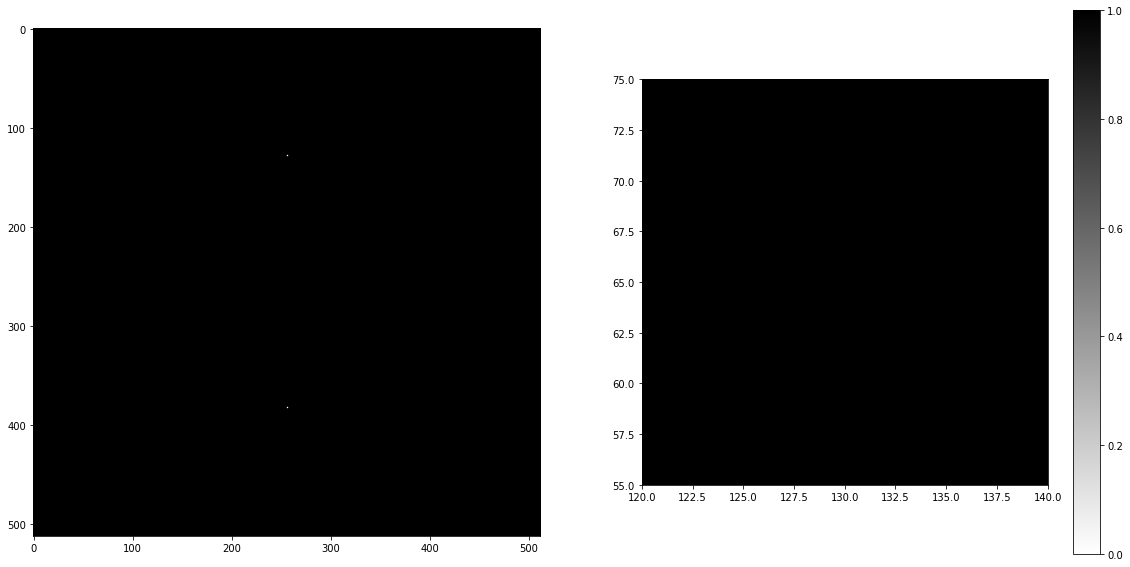

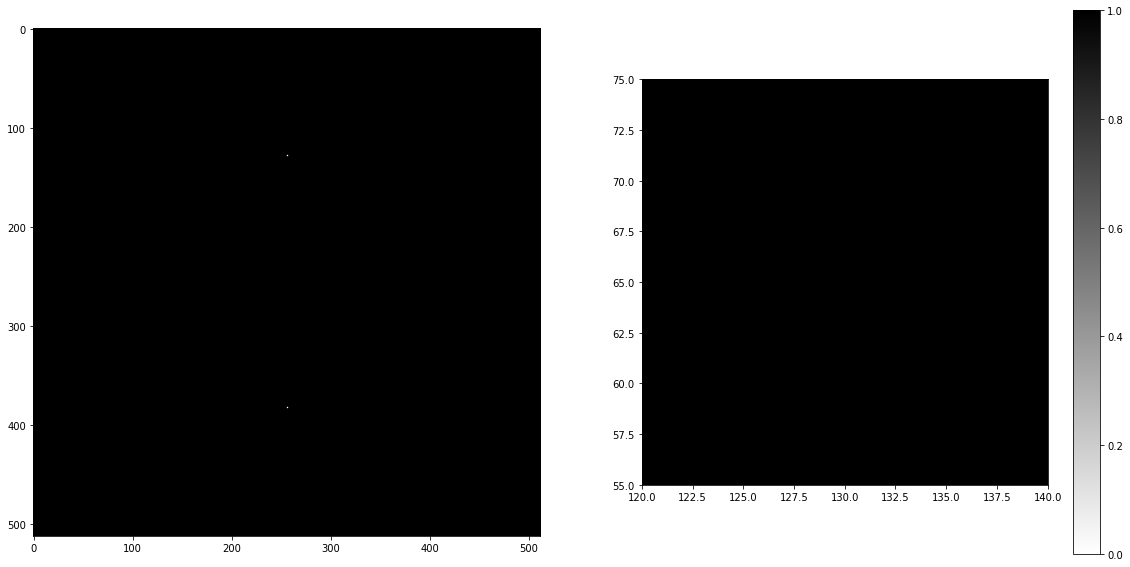

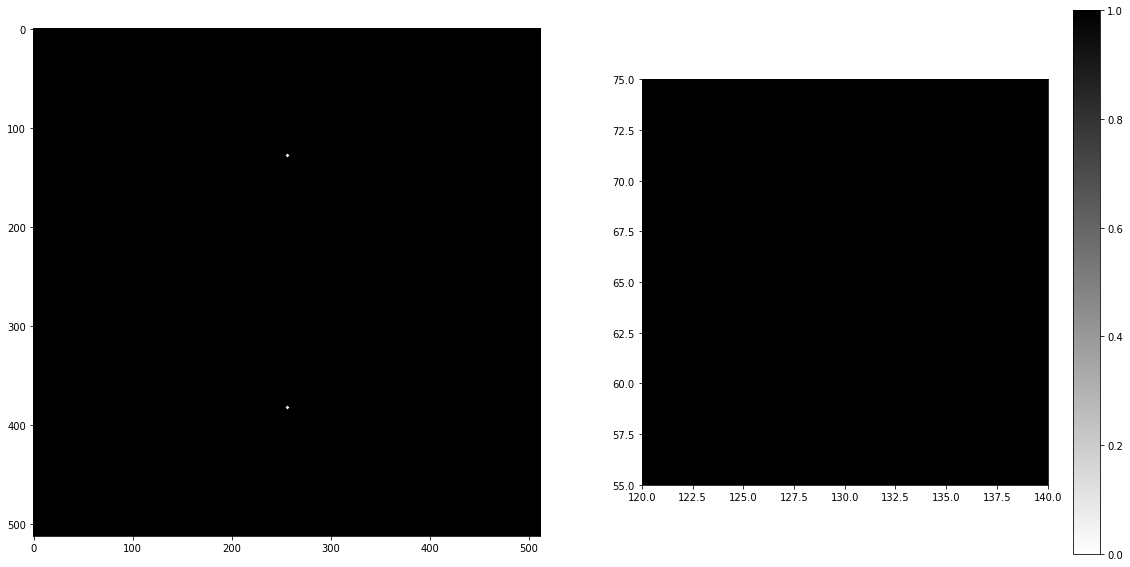

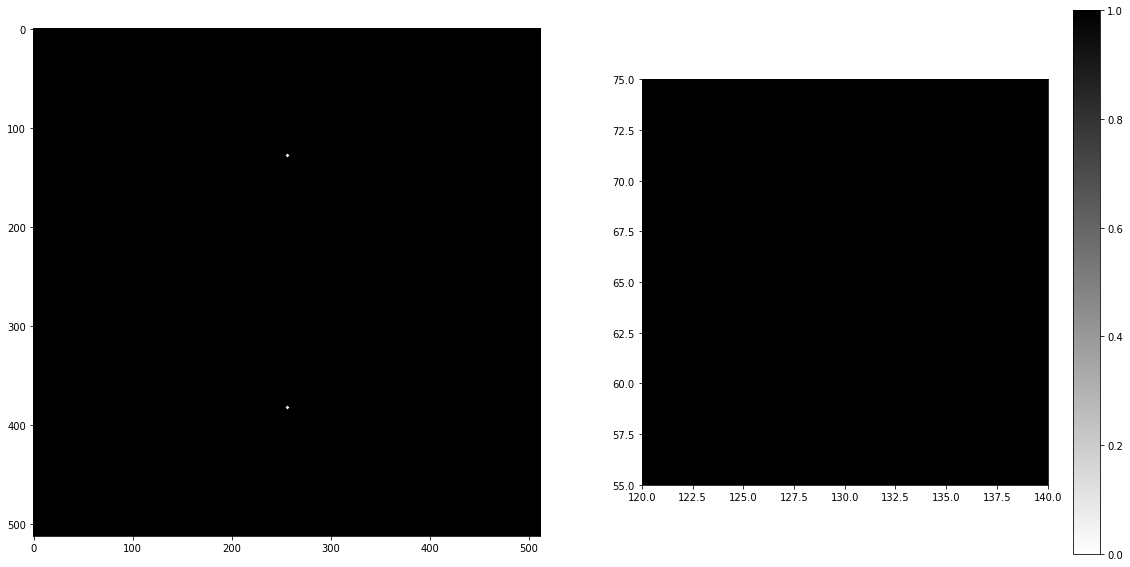

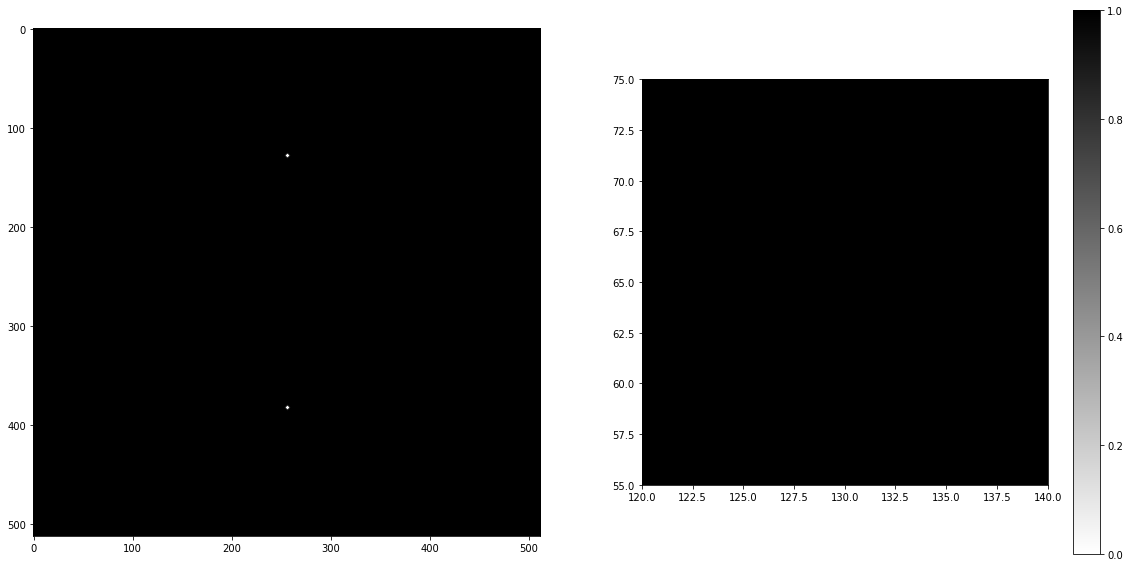

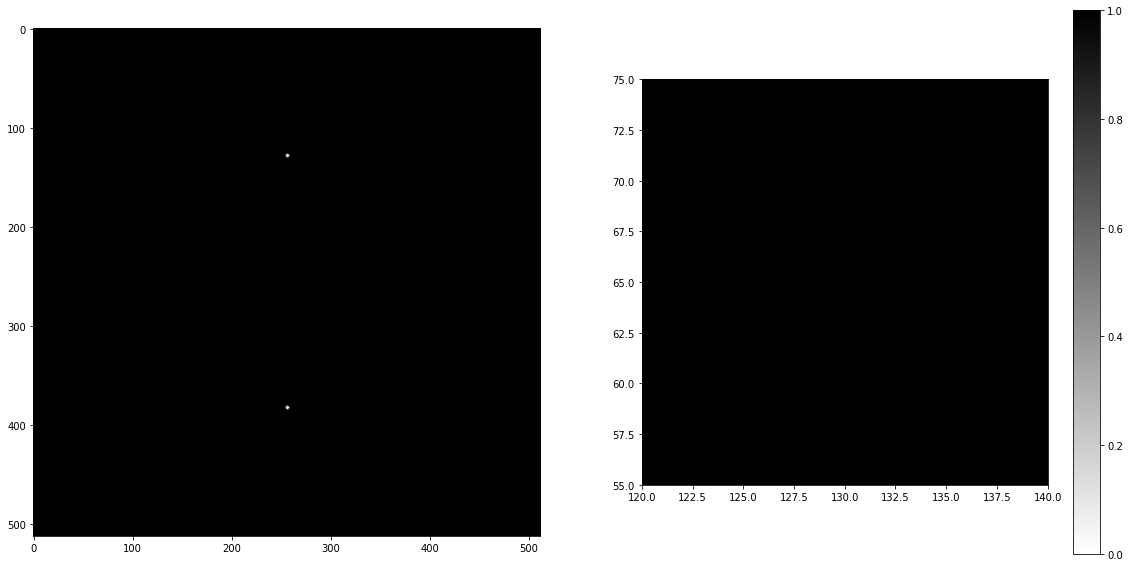

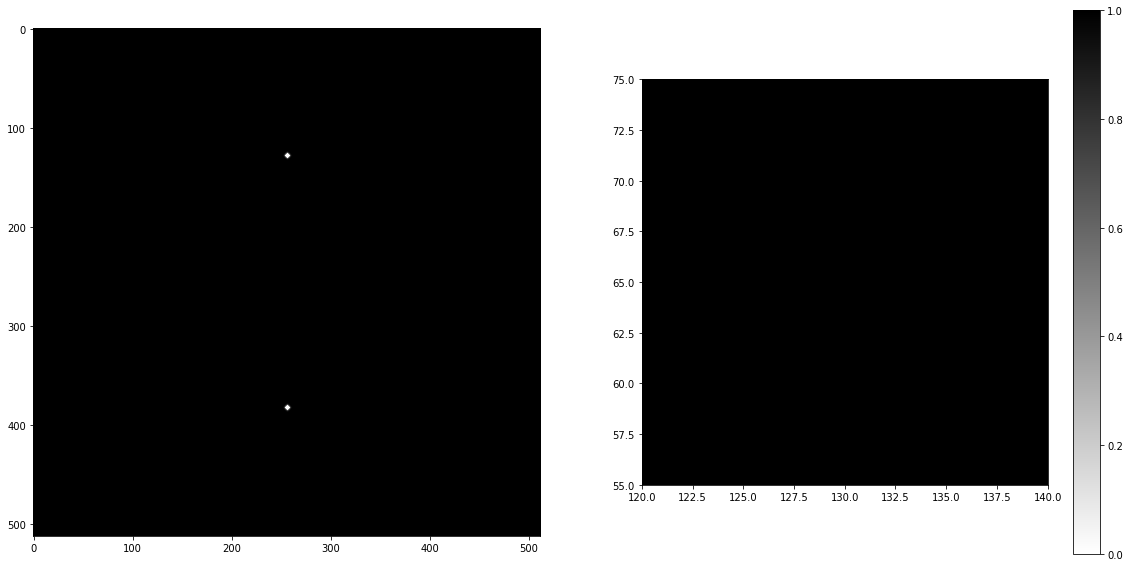

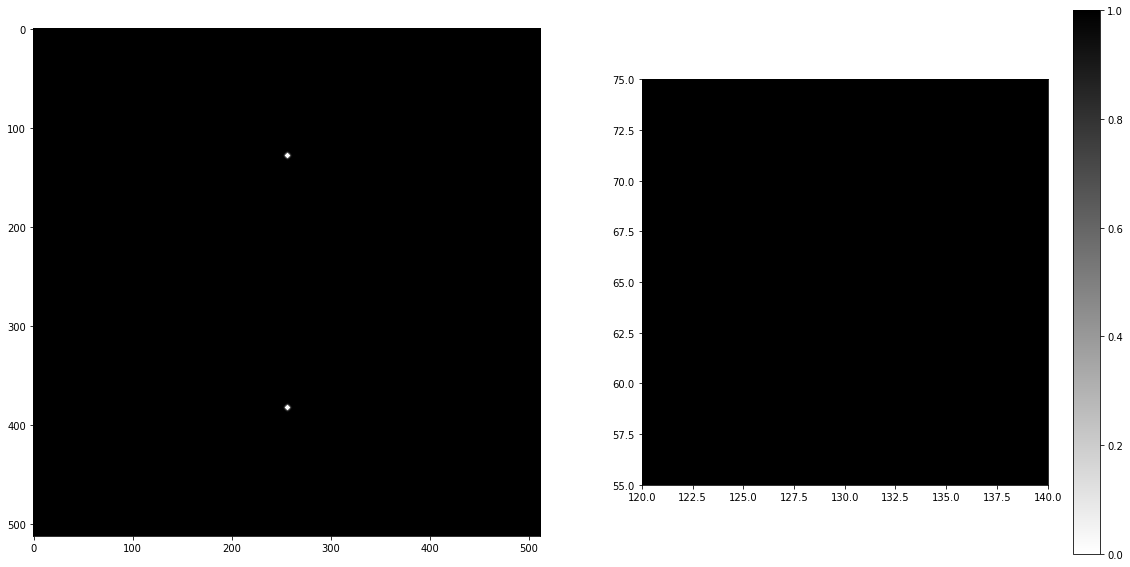

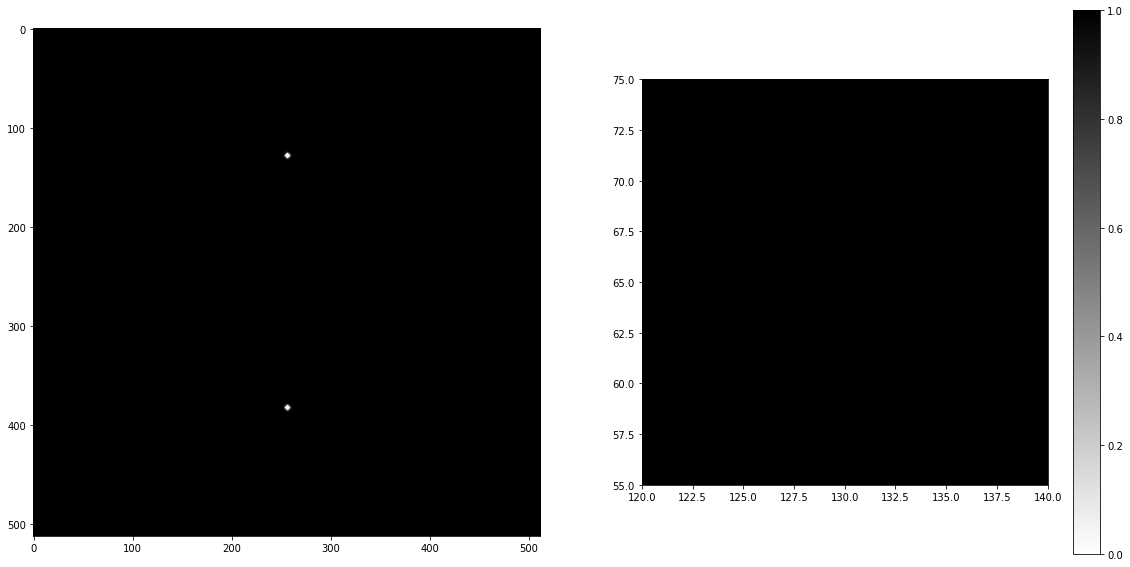

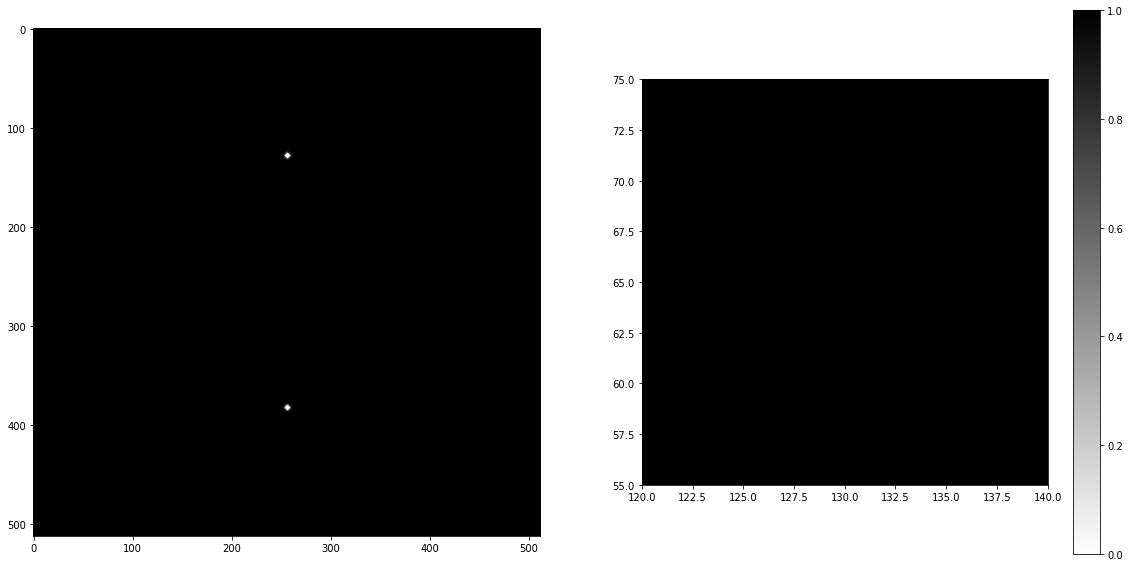

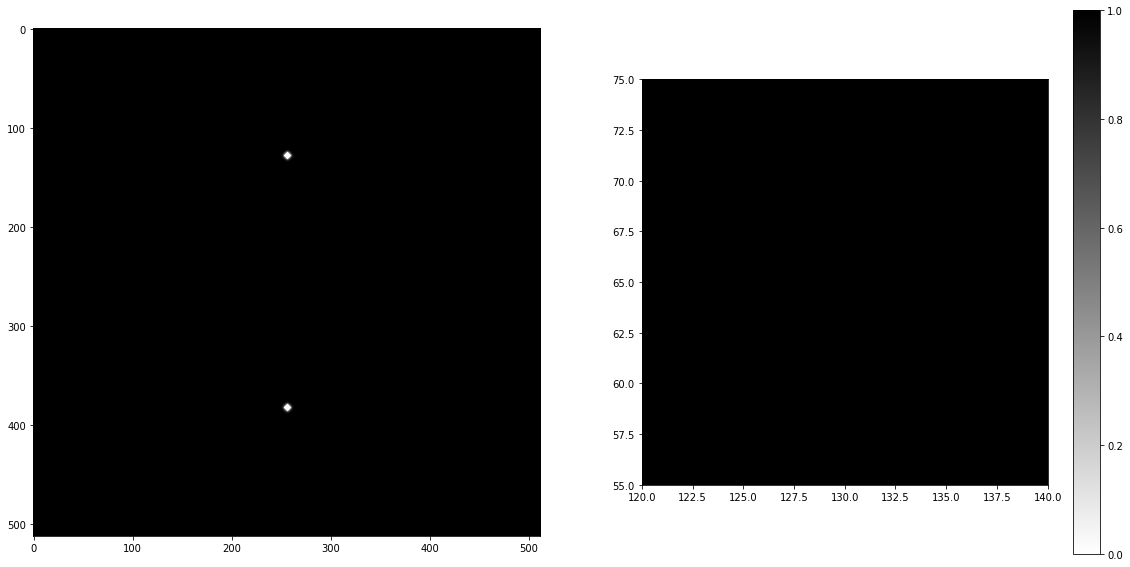

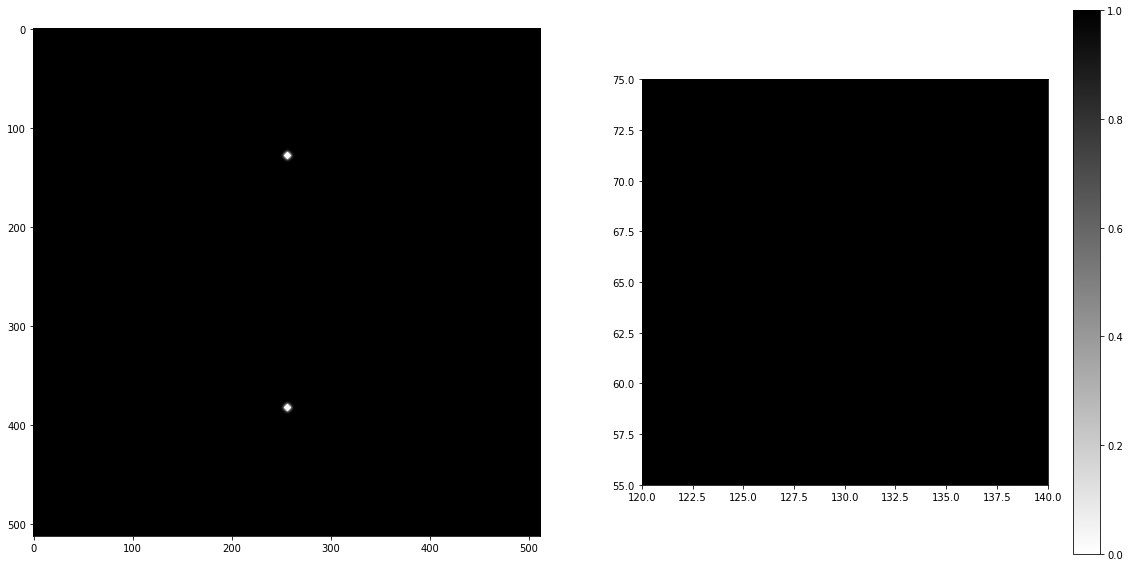

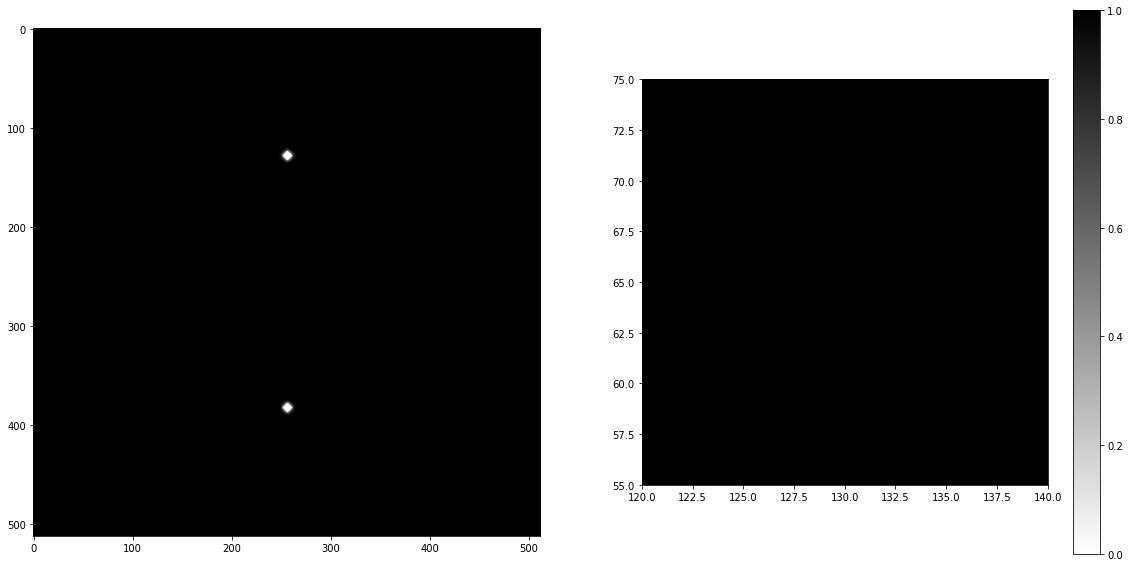

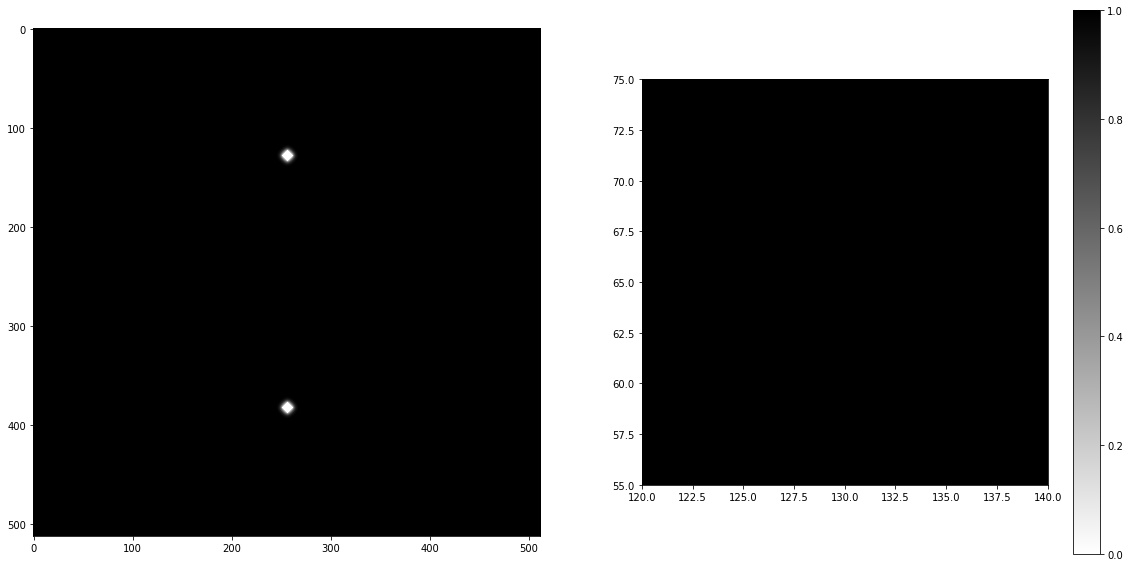

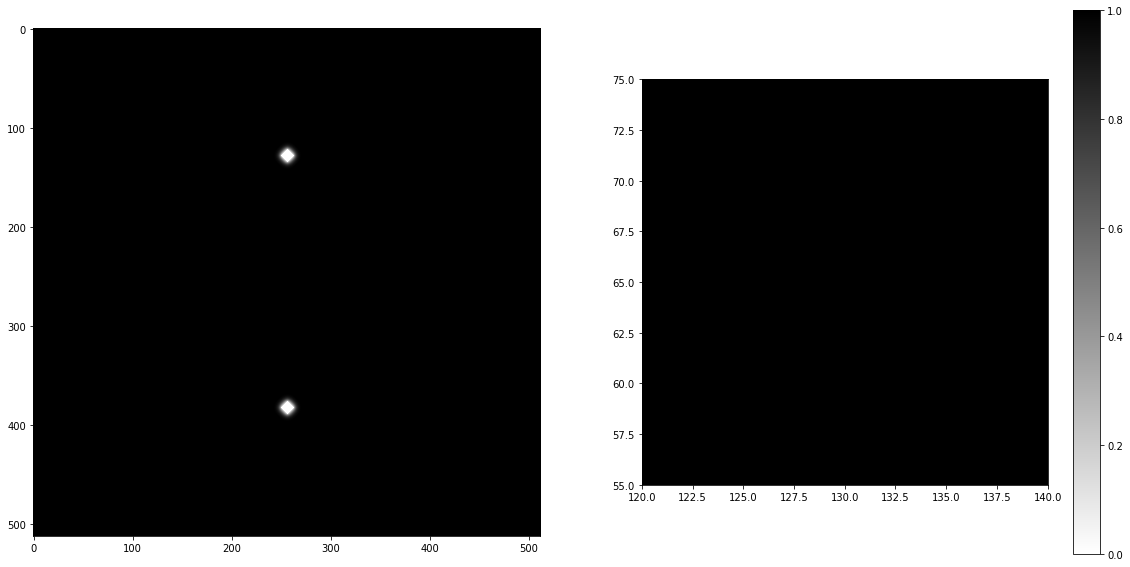

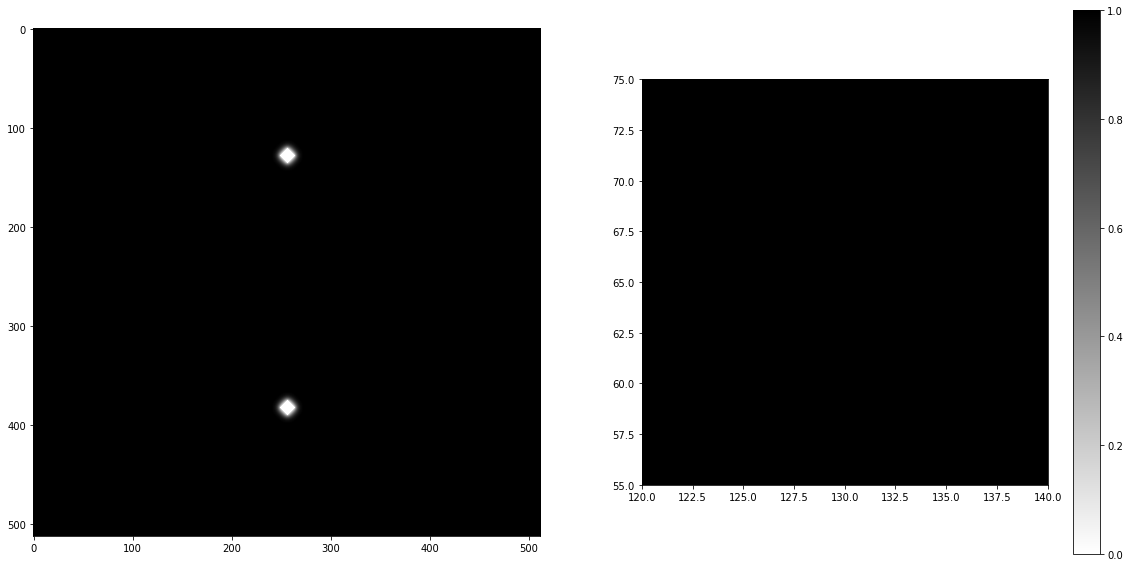

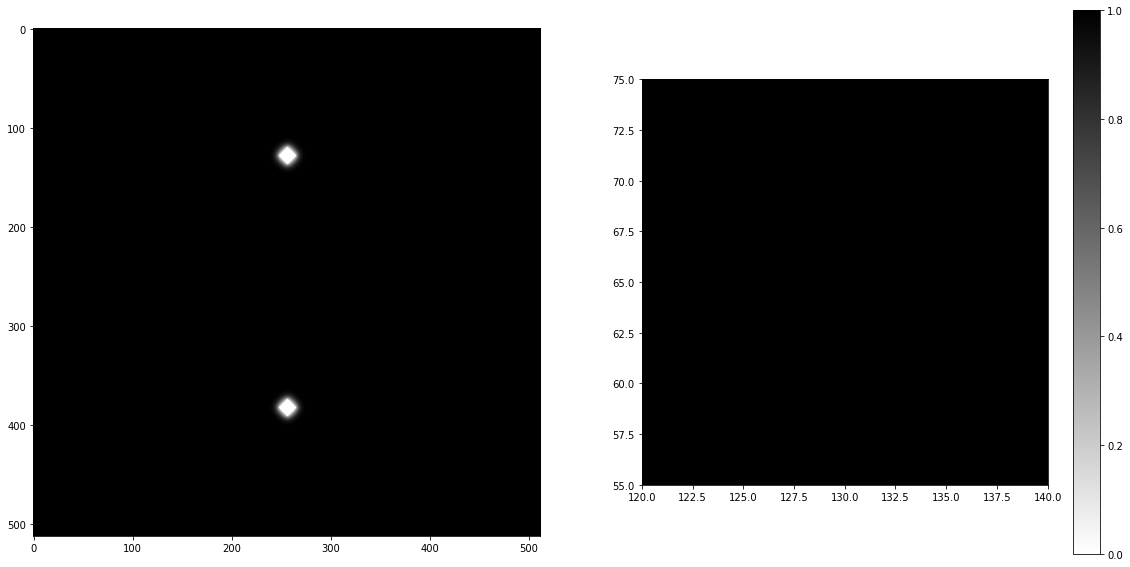

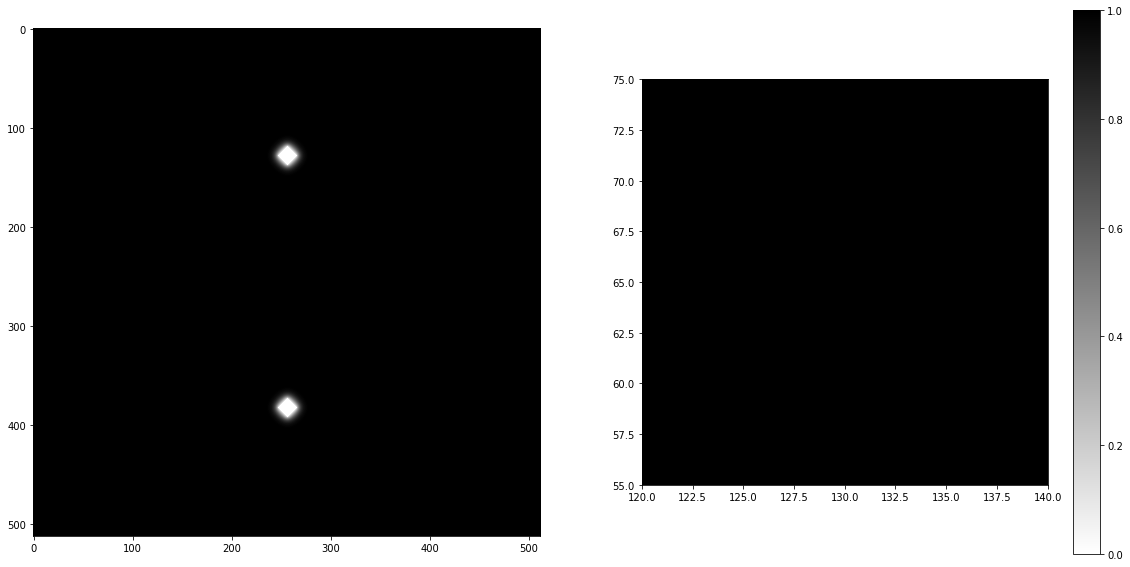

In [524]:
for st in lis:
    if (st[:3] == "W_D" ):
        a=pa.gm(f[mid],'slice/map/'+st)
        fig,ax=plt.subplots(1,2)
        ax[0].imshow(a,cmap='binary')
        im = ax[1].imshow(a,cmap='binary') ; fig.colorbar(im,ax=ax[1])
        ax[1].set_xlim([120,140]) ; ax[1].set_ylim([55,75])
        plt.show()

In [672]:
pusD=[];
for st in lis:
    if (st[:3] == "W_D" ):
        a=pa.gm(f[mid],'slice/map/'+st)
        ma3D = np.sqrt(pa.gm(f[mid],'msp'+st)[0]*renorm)
        sL = pa.gm(f[mid],'stringN')*2/3
        pusD.append([(a == 0).sum(),(1-a).sum(),ma3D/sL])
pusD=np.array(pusD)

In [673]:
# semi diff, we expect something like 

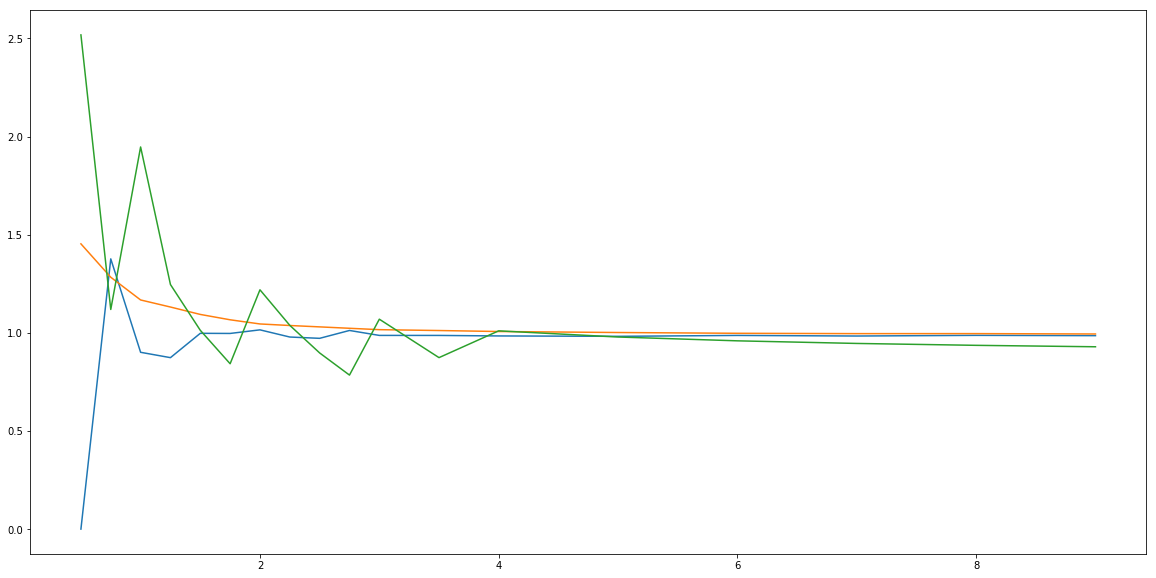

In [674]:
plt.plot(rsize/msa,pusR[:,1]/(np.pi*(rsize/msa)**2))
plt.plot(rsize/msa,pusG[:,2]/(1.92*np.pi*(rsize/msa)**2))

# plt.plot(rsize/msa,pusD[:,0]/(2*np.pi*(rsize/msa)**2))
# plt.plot(rsize/msa,pusD[:,1]/(2*np.pi*(rsize/msa)**2))
plt.plot(rsize/msa,pusD[:,2]/(2*np.pi*(rsize/msa)**2))

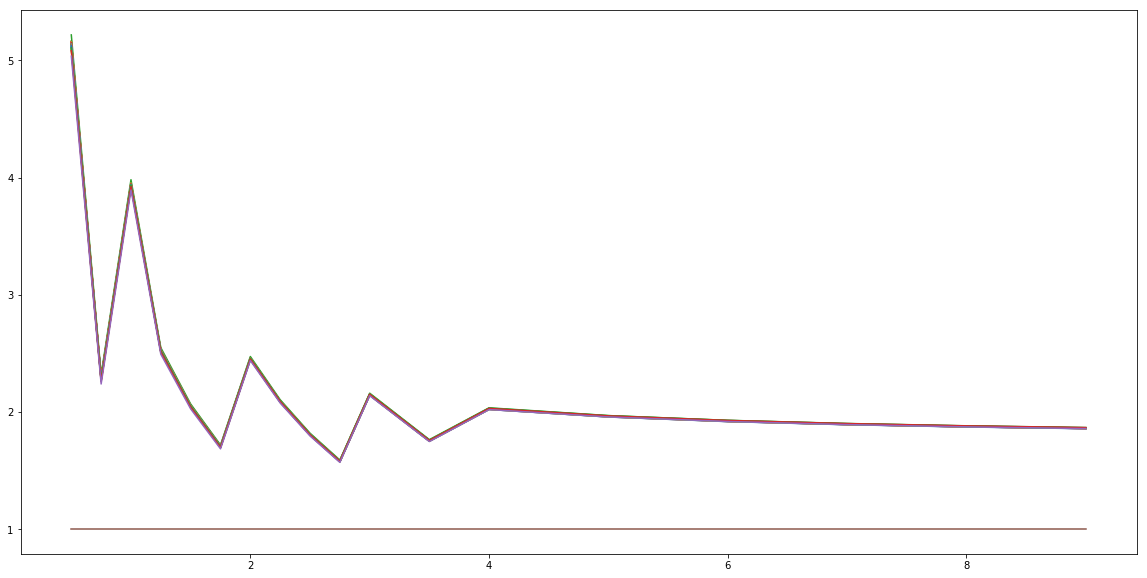

In [676]:
mpusD=[]
for i in range(len(f)):
    pusD=[]
    for st in lis:
        if (st[:3] == "W_D" ):
            a=pa.gm(f[i],'slice/map/'+st)
            ma3D = np.sqrt(pa.gm(f[i],'msp'+st)[0]*renorm)
            sL = pa.gm(f[i],'stringN')*2/3
            pusD.append([(a == 0).sum(),(1-a).sum(),ma3D/(sL)])


    mpusD.append(pusD)
mpusD=np.array(mpusD)

for pusD in mpusD:
#     plt.plot(rsize/msa,pusR[:,0]/(2*np.pi*(rsize/msa)**2))
    plt.plot(rsize/msa,pusD[:,2]/(np.pi*(rsize/msa)**2))
plt.plot(rsize/msa,rsize/rsize)

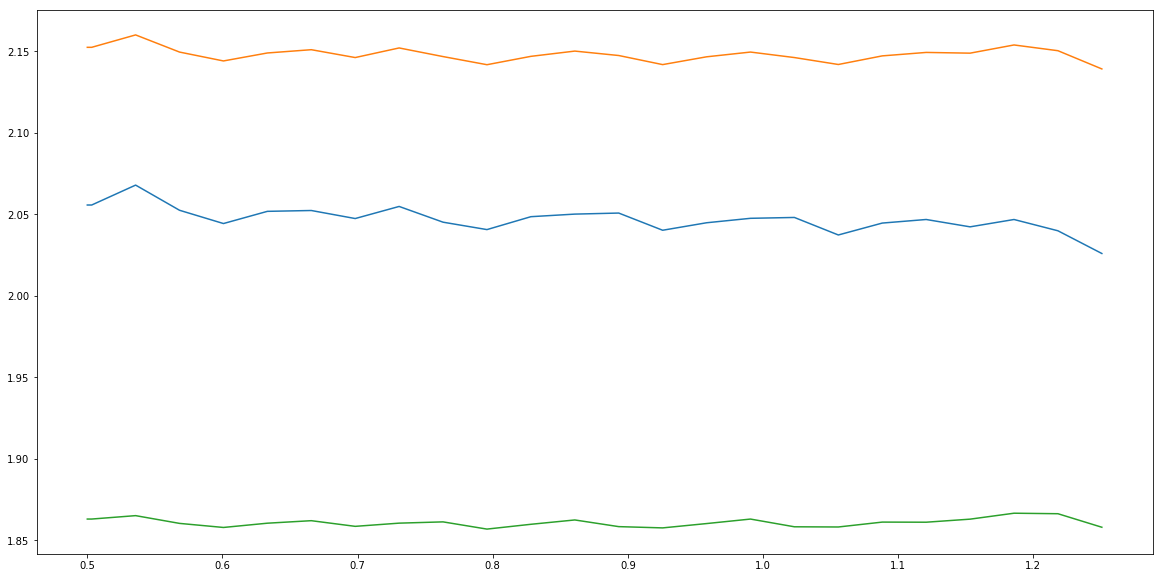

In [677]:
for ir in [4,10,-1]:
    plt.plot(ct,mpusD[:,ir,2]/(np.pi*(rsize[ir]/msa)**2))

# Viladoro 

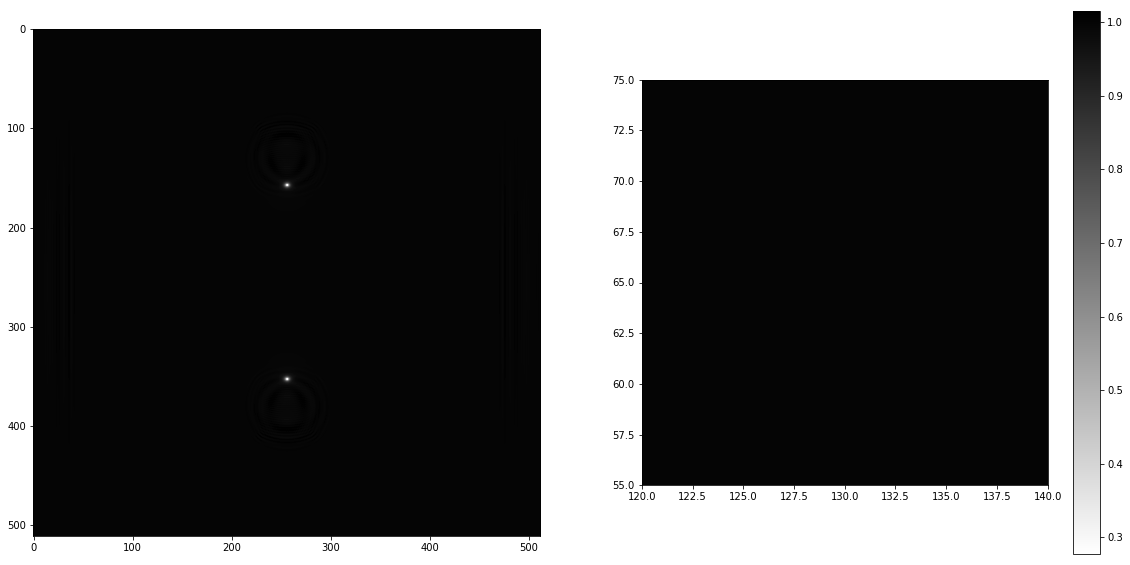

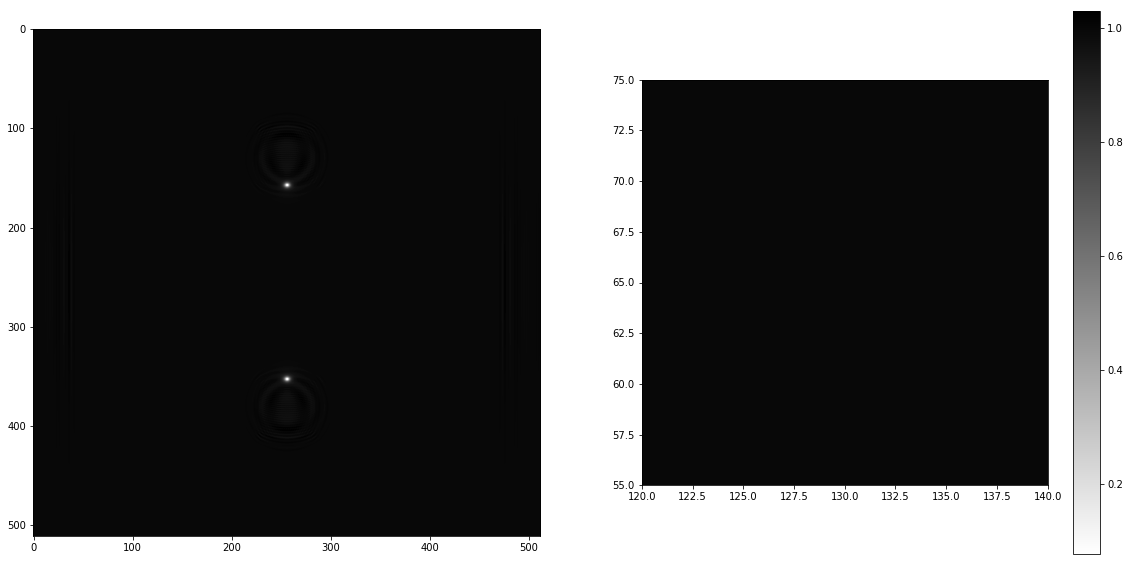

In [678]:
for st in lis:
    if (st[:4] == "W_Vi" ):
        a=pa.gm(f[mid],'slice/map/'+st)
        fig,ax=plt.subplots(1,2)
        ax[0].imshow(a,cmap='binary')
        im = ax[1].imshow(a,cmap='binary') ; fig.colorbar(im,ax=ax[1])
        ax[1].set_xlim([120,140]) ; ax[1].set_ylim([55,75])
        plt.show()

In [679]:
pusV=[];
for st in lis:
    if (st[:3] == "W_V" ):
        a=pa.gm(f[mid],'slice/map/'+st)
        ma3D = np.sqrt(pa.gm(f[mid],'msp'+st)[0]*renorm)
        sL = pa.gm(f[mid],'stringN')*2/3
        pusV.append([(a == 0).sum(),(1-a).sum(),ma3D/sL])

pusV=np.array(pusV)

In [680]:
pusV

array([[  0.        ,  98.10295868,  52.10278879],
       [  0.        , 186.76104736,  98.57729008]])

In [681]:
mpusV=[]
for i in range(len(f)):
    pusV=[]
    for st in lis:
        if (st[:3] == "W_V" ):
            a=pa.gm(f[i],'slice/map/'+st)
            ma3D = np.sqrt(pa.gm(f[i],'msp'+st)[0]*renorm)
            sL = pa.gm(f[i],'stringN')*2/3
            pusV.append([(a == 0).sum(),(1-a).sum(),ma3D/(sL)])


    mpusV.append(pusV)
mpusV=np.array(mpusV)


In [682]:
mpusV

array([[[  0.        , 257.76306152, 118.32898453],
        [  0.        , 479.59414673, 216.89534473]],

       [[  0.        , 253.61849976, 116.55783015],
        [  0.        , 472.17321777, 213.74783583]],

       [[  0.        , -12.10350704,   1.33774082],
        [  0.        , -33.70440674,   2.62489122]],

       [[  0.        , 177.30897522,  78.34576745],
        [  0.        , 343.22589111, 150.39927957]],

       [[  0.        ,  45.83641815,  27.51038959],
        [  0.        ,  79.34078979,  47.88026314]],

       [[  0.        ,  99.65849304,  45.24857225],
        [  0.        , 190.71453857,  85.69930899]],

       [[  0.        , 111.46318817,  55.73264024],
        [  0.        , 209.69398499, 103.83912801]],

       [[  0.        ,  40.02083588,  20.92546117],
        [  0.        ,  70.10155487,  36.22102015]],

       [[  0.        , 148.91104126,  70.39796669],
        [  0.        , 286.91989136, 134.62377878]],

       [[  0.        ,  14.63192463,  11.99220

In [683]:
mpusV[0,0,2]

118.32898452848724

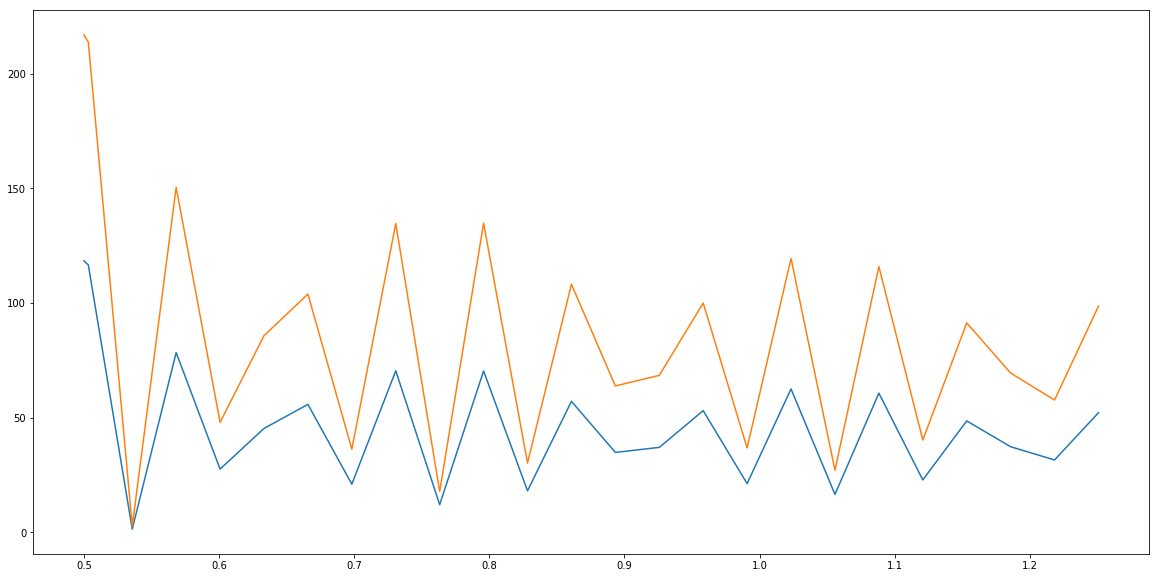

In [684]:
plt.plot(ct,ct/ct*mpusV[:,0,2])
plt.plot(ct,ct/ct*mpusV[:,1,2])


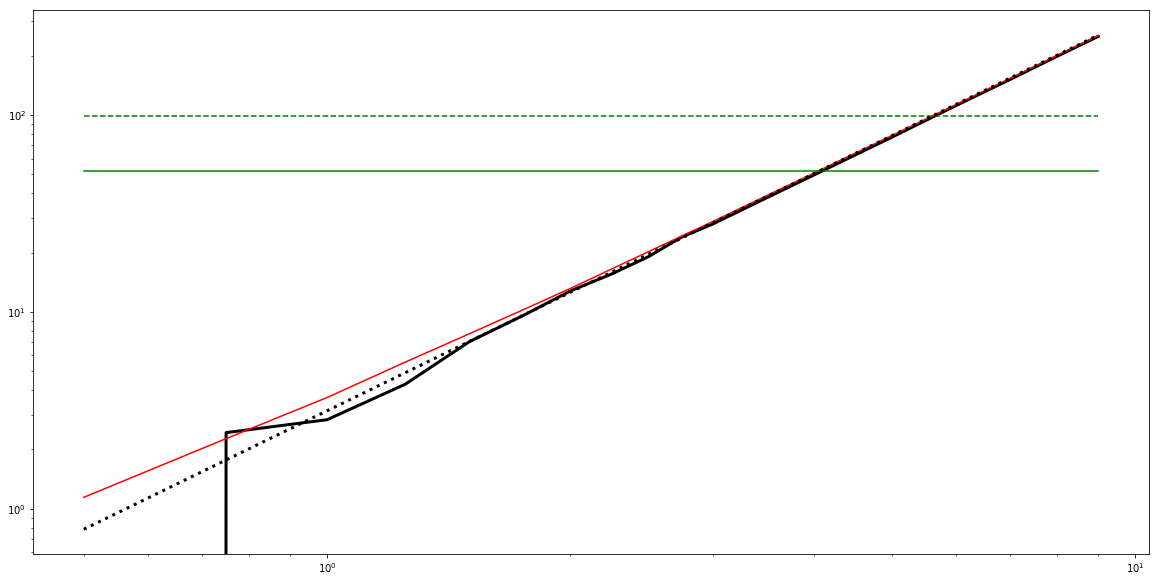

In [685]:
plt.loglog(rsize/msa,pusR[:,1],'k',linewidth=3)
plt.loglog(rsize/msa,pusG[:,2]/1.92,'r')

plt.loglog(rsize/msa,mpusV[-1,0,2]*rsize/rsize,'g')
plt.loglog(rsize/msa,mpusV[-1,1,2]*rsize/rsize,'g--')

plt.loglog(rsize/msa,np.pi*(rsize/msa)**2,'k:',linewidth=3)

(2, 6)

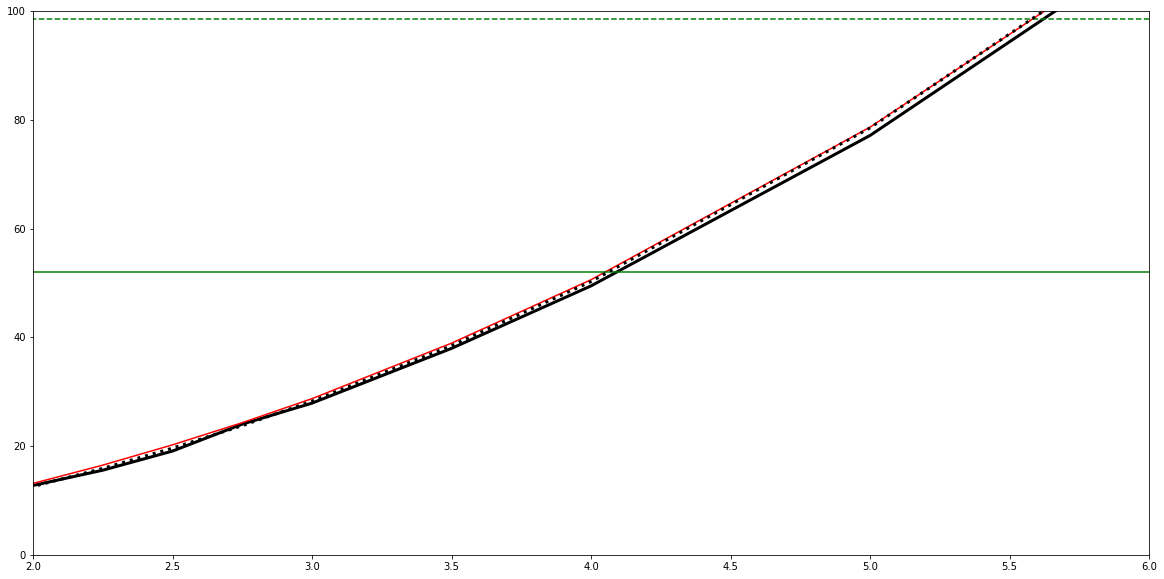

In [688]:
plt.plot(rsize/msa,mpusR[-1,:,1],'k',linewidth=3)
plt.plot(rsize/msa,mpusG[-1,:,2]/1.92,'r')

plt.plot(rsize/msa,mpusV[-1,0,2]*rsize/rsize,'g')
plt.plot(rsize/msa,mpusV[-1,1,2]*rsize/rsize,'g--')

plt.plot(rsize/msa,np.pi*(rsize/msa)**2,'k:',linewidth=3)
plt.ylim([0,100])
plt.xlim([2,6])